<a id='top'></a>

# Metrica Sports Tracking Data
##### Notebook to explore two sample matches of Event and Tracking data from [Metrica Sports](https://metrica-sports.com/).

### By [Edd Webster](https://www.twitter.com/eddwebster)
Notebook first written: 14/01/2020<br>
Notebook last updated: 15/01/2021

![title](../../../../img/metrica_pitch_control_screenshot.png)

---

## <a id='import_libraries'>Introduction</a>
This notebook is a short Exploratory Data Analysis (EDA) of [Metrica Sports](https://metrica-sports.com/) Spatiotemporal Tracking and corresponding Event data with [Python](https://www.python.org/) using [pandas](http://pandas.pydata.org/) DataFrames and [matplotlib](https://matplotlib.org/contents.html?v=20200411155018) visualisations.

For more information about this notebook and the author, I'm available through all the following channels:
*    [eddwebster.com](https://www.eddwebster.com/);
*    edd.j.webster@gmail.com;
*    [@eddwebster](https://www.twitter.com/eddwebster);
*    [linkedin.com/in/eddwebster](https://www.linkedin.com/in/eddwebster/);
*    [github/eddwebster](https://github.com/eddwebster/);
*    [public.tableau.com/profile/edd.webster](https://public.tableau.com/profile/edd.webster);
*    [kaggle.com/eddwebster](https://www.kaggle.com/eddwebster); and
*    [hackerrank.com/eddwebster](https://www.hackerrank.com/eddwebster).

![title](../../../../img/fifa21eddwebsterbanner.png)

The accompanying GitHub repository for this notebook can be found [here](https://github.com/eddwebster/football_analytics) and a static version of this notebook can be found [here](https://nbviewer.jupyter.org/github/eddwebster/football_analytics/blob/master/notebooks/A%29%20Web%20Scraping/TransferMarkt%20Web%20Scraping%20and%20Parsing.ipynb).

___

<a id='sectioncontents'></a>

## <a id='notebook_contents'>Notebook Contents</a>
1.    [Notebook Dependencies](#section1)<br>
2.    [Project Brief](#section2)<br>
3.    [Data Sources](#section3)<br>
      1.    [Introduction](#section3.1)<br>
      2.    [Data Dictionary](#section3.2)<br>
      3.    [Creating the DataFrame](#section3.3)<br>
      4.    [Initial Data Handling](#section3.4)<br>
      5.    [Export the Raw DataFrame](#section3.5)<br>         
4.    [Data Engineering](#section4)<br>
      1.    [Introduction](#section4.1)<br>
      2.    [Columns of Interest](#section4.2)<br>
      3.    [String Cleaning](#section4.3)<br>
      4.    [Converting Data Types](#section4.4)<br>
      5.    [Export the Engineered DataFrame](#section4.5)<br>
5.    [Exploratory Data Analysis (EDA)](#section5)<br>
      1.    [...](#section5.1)<br>
      2.    [...](#section5.2)<br>
      3.    [...](#section5.3)<br>
6.    [Summary](#section6)<br>
7.    [Next Steps](#section7)<br>
8.    [Bibliography](#section8)<br>

---

## <a id='#section1'>1. Notebook Dependencies</a>

This notebook was written using [Python 3](https://docs.python.org/3.7/) and requires the following libraries:
*    [`Jupyter notebooks`](https://jupyter.org/) for this notebook environment with which this project is presented;
*    [`NumPy`](http://www.numpy.org/) for multidimensional array computing;
*    [`pandas`](http://pandas.pydata.org/) for data analysis and manipulation;
*    [`Beautifulsoup`](https://pypi.org/project/beautifulsoup4/) for web scraping; and
*    [`matplotlib`](https://matplotlib.org/contents.html?v=20200411155018) for data visualisations;

All packages used for this notebook except for BeautifulSoup can be obtained by downloading and installing the [Conda](https://anaconda.org/anaconda/conda) distribution, available on all platforms (Windows, Linux and Mac OSX). Step-by-step guides on how to install Anaconda can be found for Windows [here](https://medium.com/@GalarnykMichael/install-python-on-windows-anaconda-c63c7c3d1444) and Mac [here](https://medium.com/@GalarnykMichael/install-python-on-mac-anaconda-ccd9f2014072), as well as in the Anaconda documentation itself [here](https://docs.anaconda.com/anaconda/install/).

### Import Libraries and Modules

In [1]:
# Python ≥3.5 (ideally)
import platform
import sys, getopt
assert sys.version_info >= (3, 5)
import csv

# Import Dependencies
%matplotlib inline

# Math Operations
import numpy as np
import math
from math import pi

# Datetime
import datetime
from datetime import date
import time

# Data Preprocessing
import pandas as pd
import os
import re
import random
from io import BytesIO
from pathlib import Path

# Reading directories
import glob
import os
from os.path import basename

# Working with JSON
import json
from pandas.io.json import json_normalize

# Data Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import patches
import seaborn as sns
plt.style.use('seaborn-whitegrid')
import missingno as msno

# Progress Bar
from tqdm import tqdm

# Football libraries
from FCPython import createPitch

# Display in Jupyter
from IPython.display import Image, Video, YouTubeVideo
from IPython.core.display import HTML

# Ignore Warnings
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

print('Setup Complete')

Setup Complete


In [2]:
# Python / module versions used here for reference
print('Python: {}'.format(platform.python_version()))
print('NumPy: {}'.format(np.__version__))
print('pandas: {}'.format(pd.__version__))
print('matplotlib: {}'.format(mpl.__version__))
print('Seaborn: {}'.format(sns.__version__))

Python: 3.7.6
NumPy: 1.18.0
pandas: 1.2.0
matplotlib: 3.3.2
Seaborn: 0.11.1


### Defined Variables

In [3]:
# Define today's date
today = datetime.datetime.now().strftime('%d/%m/%Y').replace('/', '')

### Defined Filepaths

In [4]:
# Set up initial paths to subfolders
base_dir = os.path.join('..', '..', '..', '..')
data_dir = os.path.join(base_dir, 'data')
data_dir_metrica = os.path.join(base_dir, 'data', 'metrica')
scripts_dir = os.path.join(base_dir, 'scripts')
scripts_dir_metrica = os.path.join(base_dir, 'scripts', 'metrica')
img_dir = os.path.join(base_dir, 'img')
fig_dir = os.path.join(base_dir, 'img', 'fig')
fig_dir_metrica = os.path.join(base_dir, 'img', 'fig', 'metrica')
video_dir = os.path.join(base_dir, 'video')
video_dir_metrica = os.path.join(base_dir, 'video', 'metrica')

### Custom Libraries for Tracking Data

In [5]:
# Custom libraries for working with Metrica data based by Laurie Shaw

## Define path of scripts
sys.path.insert(0, os.path.abspath(scripts_dir_metrica))

# Laurie Shaw's custom libraries for working with Metrica Sports data
import Metrica_IO as mio
import Metrica_Viz as mviz
import Metrica_Velocities as mvel
import Metrica_PitchControl as mpc
import Metrica_EPV as mepv

### Notebook Settings

In [6]:
pd.set_option('display.max_columns', None)

---

## <a id='#section2'>2. Project Brief</a>
This Jupyter notebook engineered scraped football data from [Metrica Sports](https://metrica-sports.com/) using [pandas](http://pandas.pydata.org/) for data manipulation through DataFrames.

The data of player values produced in this notebook is exported to CSV. This data can be further analysed in Python, joined to other datasets, or explored using dashboarding tools such as Tableau or PowerBI, or explores in a spreadsheet such as Microsoft Excel or Google Sheets.

---

## <a id='#section3'>3. Data Sources</a>

### <a id='#section3.1'>3.1. Introduction</a>
[Metrica Sports](https://metrica-sports.com/) is a...

![title](../../../../img/metrica-sports.png)

The event data comprises of the on-ball actions that were performef during the match. For each event, the following information is known:
1. the match time at which the event occurred
2. the onball player
3. the type of event (e.g. pass, shot, goal, etc.).

The tracking data represents the location of every player on the pitch with a temporal frequency of 25 Hz and the corresponding match time for each tracking frame is specified.

Before conducting our EDA, the data needs to be imported as a DataFrame in the Data Sources section [Section 3](#section3) and cleaned in the Data Engineering section [Section 4](#section4).


We'll be using the [pandas](http://pandas.pydata.org/) library to import our data to this workbook as a DataFrame.

### <a id='#section3.2'>3.2. Import Data</a>

#### <a id='#section3.2.1'>3.2.1. Event Data</a>

##### <a id='#section3.2.1.1'>3.2.1.1. Data Dictionaries</a>
The [Metrica Sports](https://metrica-sports.com/) Events dataset has fourteen features (columns) with the following definitions and data types:

| Feature     | Data type    |
|------|-----|
| `Team`    | object     |
| `Type`    | object     |
| `Subtype`    | object     |
| `Period`    | int64     |
| `Start Frame `    | int64     |
| `Start Time [s]`    | float64     |
| `End Frame`    | int64     |
| `End Time [s]`    | float64     |
| `From`    | object     |
| `To`    | object     |
| `Start X`    | float64     |
| `Start Y`    | float64     |
| `End X`    | float64     |
| `End Y`    | float64     |

For a full list of definitions, see the Metrica Sports documentation [[link](https://github.com/metrica-sports/sample-data/blob/master/documentation/events-definitions.pdf).

##### <a id='#section3.2.1.2'>3.2.1.2. Import CSV as a pandas DataFrame</a>

In [7]:
# Define match to import (2 matches available)
game_id = 2     # sample match 2

# Read in the Event data - uses a function from the Metrica_IO library
df_events = mio.read_event_data(data_dir_metrica, game_id)    # reads in data into the DataFrame and returns events

##### <a id='#section3.2.1.3'>3.2.1.3.  Preliminary Data Handling</a>
Let's quality of the dataset by looking first and last rows in pandas using the [head()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html) and [tail()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.tail.html) methods.

In [8]:
# Display the first 5 rows of the raw DataFrame, df_events
df_events.head()

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y
0,Away,SET PIECE,KICK OFF,1,51,2.04,51,2.04,Player23,NaN,NaN,NaN,NaN,NaN
1,Away,PASS,NaN,1,51,2.04,87,3.48,Player23,Player20,0.50,0.50,0.40,0.51
2,Away,PASS,NaN,1,146,5.84,186,7.44,Player20,Player18,0.43,0.50,0.44,0.22
3,Away,PASS,NaN,1,248,9.92,283,11.32,Player18,Player17,0.47,0.19,0.31,0.28
4,Away,PASS,NaN,1,316,12.64,346,13.84,Player17,Player16,0.29,0.32,0.26,0.58


In [9]:
# Display the last 5 rows of the raw DataFrame, df_events
df_events.tail()

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y
1930,Away,BALL LOST,INTERCEPTION,2,140122,5604.88,140183,5607.32,Player21,NaN,0.54,0.77,0.29,0.24
1931,Home,CHALLENGE,AERIAL-LOST,2,140180,5607.20,140180,5607.20,Player1,NaN,0.31,0.30,NaN,NaN
1932,Away,CHALLENGE,AERIAL-LOST,2,140183,5607.32,140183,5607.32,Player24,NaN,0.32,0.30,NaN,NaN
1933,Home,RECOVERY,NaN,2,140211,5608.44,140211,5608.44,Player12,NaN,0.34,0.32,NaN,NaN
1934,Home,BALL OUT,CLEARANCE,2,140265,5610.60,140298,5611.92,Player12,NaN,0.33,0.16,0.41,-0.04


In [10]:
# Print the shape of the raw DataFrame, df_events
print(df_events.shape)

(1935, 14)


In [11]:
# Print the column names of the raw DataFrame, df_events
print(df_events.columns)

Index(['Team', 'Type', 'Subtype', 'Period', 'Start Frame', 'Start Time [s]',
       'End Frame', 'End Time [s]', 'From', 'To', 'Start X', 'Start Y',
       'End X', 'End Y'],
      dtype='object')


The dataset has fourteen features (columns). Full details of these attributes can be found in the [Data Dictionary](section3.3.1).

In [12]:
# Data types of the features of the raw DataFrame, df_events
df_events.dtypes

Team               object
Type               object
Subtype            object
Period              int64
Start Frame         int64
Start Time [s]    float64
End Frame           int64
End Time [s]      float64
From               object
To                 object
Start X           float64
Start Y           float64
End X             float64
End Y             float64
dtype: object

In [13]:
# See all the types and quantities of each event
df_events['Type'].value_counts()

PASS              964
CHALLENGE         311
RECOVERY          248
BALL LOST         233
SET PIECE          80
BALL OUT           49
SHOT               24
FAULT RECEIVED     20
CARD                6
Name: Type, dtype: int64

All fourteen of the columns have the object data type. Full details of these attributes and their data types can be found in the [Data Dictionary](section3.3.1).

In [14]:
# Info for the raw DataFrame, df_events
df_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1935 entries, 0 to 1934
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Team            1935 non-null   object 
 1   Type            1935 non-null   object 
 2   Subtype         868 non-null    object 
 3   Period          1935 non-null   int64  
 4   Start Frame     1935 non-null   int64  
 5   Start Time [s]  1935 non-null   float64
 6   End Frame       1935 non-null   int64  
 7   End Time [s]    1935 non-null   float64
 8   From            1935 non-null   object 
 9   To              964 non-null    object 
 10  Start X         1849 non-null   float64
 11  Start Y         1849 non-null   float64
 12  End X           1221 non-null   float64
 13  End Y           1221 non-null   float64
dtypes: float64(6), int64(3), object(5)
memory usage: 211.8+ KB


In [15]:
# Description of the raw DataFrame, df_events, showing some summary statistics for each numberical column in the DataFrame
df_events.describe()

,Period,Start Frame,Start Time [s],End Frame,End Time [s],Start X,Start Y,End X,End Y
count,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1849.000000,1849.000000,1221.000000,1221.000000
mean,1.468217,65422.160207,2616.886408,65444.214470,2617.768579,0.494446,0.518096,0.499476,0.512776
std,0.499118,39412.118805,1576.484752,39410.201977,1576.408079,0.238115,0.297417,0.229955,0.306112
min,1.000000,51.000000,2.040000,51.000000,2.040000,-0.010000,-0.030000,-0.080000,-0.040000
25%,1.000000,30974.500000,1238.980000,30978.000000,1239.120000,0.320000,0.250000,0.340000,0.240000
50%,1.000000,64182.000000,2567.280000,64239.000000,2569.560000,0.500000,0.520000,0.510000,0.520000
75%,2.000000,96722.000000,3868.880000,96756.000000,3870.240000,0.680000,0.790000,0.660000,0.780000
max,2.000000,140265.000000,5610.600000,140298.000000,5611.920000,1.030000,1.020000,1.020000,1.040000


<AxesSubplot:>

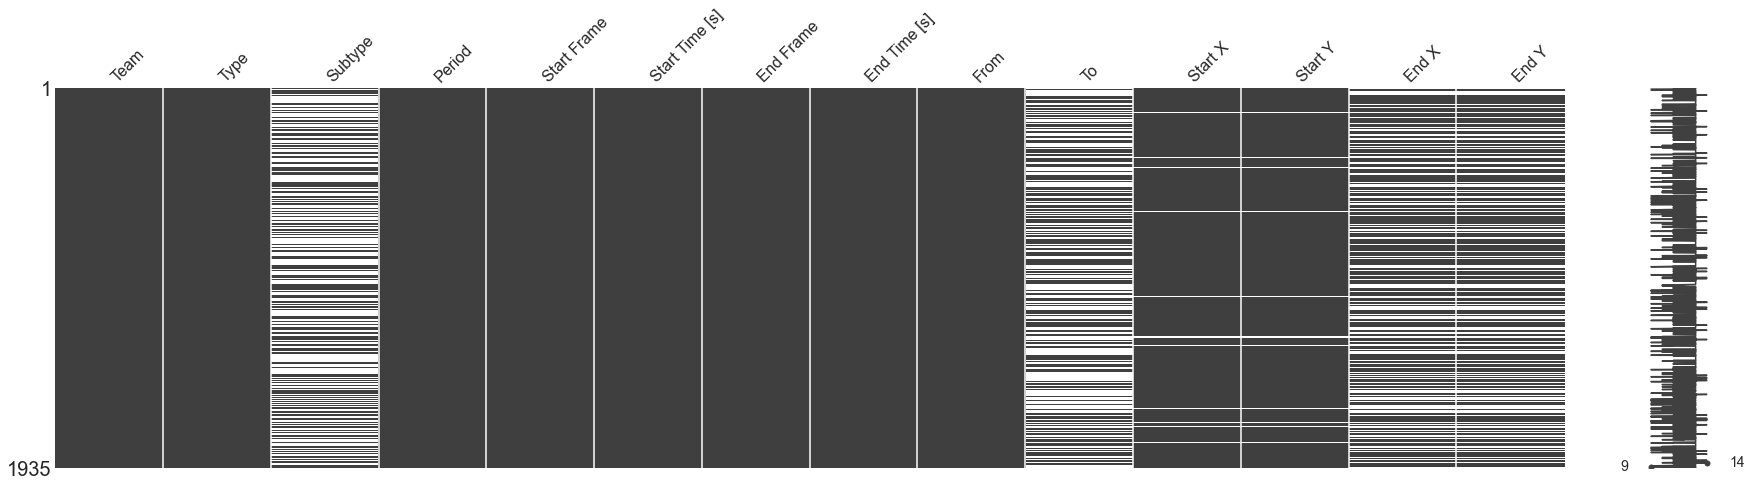

In [16]:
# Plot visualisation of the missing values for each feature of the raw DataFrame, df_events
msno.matrix(df_events, figsize = (30, 7))

In [17]:
# Counts of missing values
tm_bio_null_value_stats = df_events.isnull().sum(axis=0)
tm_bio_null_value_stats[tm_bio_null_value_stats != 0]

Subtype    1067
To          971
Start X      86
Start Y      86
End X       714
End Y       714
dtype: int64

The visualisation shows us very quickly that there a few missing values in most of the columns, but the dataset is ready for us.

#### <a id='#section3.2.2'>3.2.2. Tracking Data</a>

The Spatiotemporal Tracking data for each of the two sample matches available consists of the positions of all 22 players and the ball, sampled at a frequency of 25Hz. Individual player identities are tagged in the data, enabling tracking of each player over time. 

##### <a id='#section3.2.2.1'>3.2.2.1.  Data Dictionaries</a>
The [Metrica Sports](https://metrica-sports.com/) Tracking datasets have fourteen features (columns) with the following definitions and data types:

| Feature     | Data type    |
|------|-----|
| `Team`    | object     |
| `Type`    | object     |
| `Subtype`    | object     |
| `Period`    | int64     |
| `Start Frame `    | int64     |
| `Start Time [s]`    | float64     |
| `End Frame`    | int64     |
| `End Time [s]`    | float64     |
| `From`    | object     |
| `To`    | object     |
| `Start X`    | float64     |
| `Start Y`    | float64     |
| `End X`    | float64     |
| `End Y`    | float64     |

For a full list of definitions, see the Metrica Sports documentation [[link](https://github.com/metrica-sports/sample-data/blob/master/documentation/events-definitions.pdf).

##### <a id='#section3.2.2.2'>3.2.2.2. Import CSV as a pandas DataFrame</a>

In [18]:
# Read in the Tracking data - uses a function from the Metrica_IO library

## Home team
df_tracking_home = mio.tracking_data(data_dir_metrica, game_id, 'Home')

## Away team
df_tracking_away = mio.tracking_data(data_dir_metrica, game_id, 'Away')

Reading team: home
Reading team: away


##### <a id='#section3.2.2.3'>3.2.2.3.  Preliminary Data Handling</a>
For the data quality check, we will just look at the tracking data for the Home team.

Let's quality of the dataset by looking first and last rows in pandas using the [head()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html) and [tail()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.tail.html) methods.

In [19]:
# Display the first 5 rows of the raw DataFrame, df_tracking_home
df_tracking_home.head()

,Period,Time [s],Home_11_x,Home_11_y,Home_1_x,Home_1_y,Home_2_x,Home_2_y,Home_3_x,Home_3_y,Home_4_x,Home_4_y,Home_5_x,Home_5_y,Home_6_x,Home_6_y,Home_7_x,Home_7_y,Home_8_x,Home_8_y,Home_9_x,Home_9_y,Home_10_x,Home_10_y,Home_12_x,Home_12_y,Home_13_x,Home_13_y,Home_14_x,Home_14_y,ball_x,ball_y
Frame,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1,0.04,0.94275,0.50413,0.64812,0.28605,0.67752,0.42803,0.69882,0.55606,0.64348,0.76253,0.23339,0.25869,0.60269,0.47397,0.58508,0.53017,0.53163,0.75084,0.50637,0.30137,0.50194,0.61123,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,0.08,0.94275,0.50413,0.64812,0.28605,0.67752,0.42803,0.69882,0.55606,0.64348,0.76253,0.23339,0.25869,0.60269,0.47397,0.58508,0.53017,0.53163,0.75084,0.50637,0.30137,0.50194,0.61123,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,0.12,0.94275,0.50413,0.64812,0.28605,0.67752,0.42803,0.69882,0.55606,0.64348,0.76253,0.23339,0.25869,0.60269,0.47397,0.58508,0.53017,0.53163,0.75084,0.50637,0.30137,0.50194,0.61123,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,0.16,0.94275,0.50413,0.64812,0.28605,0.67752,0.42803,0.69882,0.55606,0.64348,0.76253,0.23254,0.25870,0.60269,0.47397,0.58508,0.53017,0.53163,0.75084,0.50637,0.30137,0.50194,0.61123,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1,0.20,0.94275,0.50413,0.64812,0.28605,0.67752,0.42803,0.69882,0.55606,0.64348,0.76253,0.23170,0.25871,0.60269,0.47397,0.58508,0.53017,0.53163,0.75084,0.50637,0.30137,0.50194,0.61123,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
# Display the last 5 rows of the raw DataFrame, df_tracking_home
df_tracking_home.tail()

,Period,Time [s],Home_11_x,Home_11_y,Home_1_x,Home_1_y,Home_2_x,Home_2_y,Home_3_x,Home_3_y,Home_4_x,Home_4_y,Home_5_x,Home_5_y,Home_6_x,Home_6_y,Home_7_x,Home_7_y,Home_8_x,Home_8_y,Home_9_x,Home_9_y,Home_10_x,Home_10_y,Home_12_x,Home_12_y,Home_13_x,Home_13_y,Home_14_x,Home_14_y,ball_x,ball_y
Frame,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
141152,2,5646.08,0.06285,0.51243,0.38499,0.15356,0.22558,0.41355,0.27142,0.32209,NaN,NaN,0.40592,0.08002,0.38915,0.56413,0.36216,0.56218,NaN,NaN,0.28426,0.35845,NaN,NaN,0.40837,0.14449,0.51032,0.94554,0.27962,0.36700,NaN,NaN
141153,2,5646.12,0.06285,0.51243,0.38499,0.15356,0.22558,0.41355,0.27142,0.32209,NaN,NaN,0.40592,0.08002,0.38965,0.56395,0.36216,0.56218,NaN,NaN,0.28365,0.35933,NaN,NaN,0.40837,0.14449,0.51031,0.94626,0.28009,0.36718,NaN,NaN
141154,2,5646.16,0.06285,0.51243,0.38499,0.15356,0.22558,0.41355,0.27142,0.32209,NaN,NaN,0.40592,0.08002,0.38986,0.56329,0.36216,0.56218,NaN,NaN,0.28322,0.36067,NaN,NaN,0.40837,0.14449,0.51029,0.94711,0.28031,0.36726,NaN,NaN
141155,2,5646.20,0.06285,0.51243,0.38499,0.15356,0.22558,0.41355,0.27142,0.32209,NaN,NaN,0.40592,0.08002,0.39001,0.56208,0.36216,0.56218,NaN,NaN,0.28266,0.36095,NaN,NaN,0.40837,0.14449,0.51028,0.94792,0.28059,0.36706,NaN,NaN
141156,2,5646.24,0.06285,0.51243,0.38499,0.15356,0.22558,0.41355,0.27142,0.32209,NaN,NaN,0.40592,0.08002,0.39007,0.56250,0.36216,0.56218,NaN,NaN,0.28201,0.36123,NaN,NaN,0.40837,0.14449,0.51029,0.94846,0.28065,0.36491,NaN,NaN


In [21]:
# Print the shape of the raw DataFrame, df_tracking_home
print(df_tracking_home.shape)    # 141,156 rows i.e. frames

(141156, 32)


In [22]:
# i.e 25 frames per second, in 90 minutes
25 * 60 * 90

135000

In [23]:
# Print the column names of the raw DataFrame, df_tracking_home
print(df_tracking_home.columns)

Index(['Period', 'Time [s]', 'Home_11_x', 'Home_11_y', 'Home_1_x', 'Home_1_y',
       'Home_2_x', 'Home_2_y', 'Home_3_x', 'Home_3_y', 'Home_4_x', 'Home_4_y',
       'Home_5_x', 'Home_5_y', 'Home_6_x', 'Home_6_y', 'Home_7_x', 'Home_7_y',
       'Home_8_x', 'Home_8_y', 'Home_9_x', 'Home_9_y', 'Home_10_x',
       'Home_10_y', 'Home_12_x', 'Home_12_y', 'Home_13_x', 'Home_13_y',
       'Home_14_x', 'Home_14_y', 'ball_x', 'ball_y'],
      dtype='object')


The dataset has fourteen features (columns). Full details of these attributes can be found in the [Data Dictionary](section3.3.1).

In [24]:
# Data types of the features of the raw DataFrame, df_tracking_home
df_tracking_home.dtypes

Period         int64
Time [s]     float64
Home_11_x    float64
Home_11_y    float64
Home_1_x     float64
Home_1_y     float64
Home_2_x     float64
Home_2_y     float64
Home_3_x     float64
Home_3_y     float64
Home_4_x     float64
Home_4_y     float64
Home_5_x     float64
Home_5_y     float64
Home_6_x     float64
Home_6_y     float64
Home_7_x     float64
Home_7_y     float64
Home_8_x     float64
Home_8_y     float64
Home_9_x     float64
Home_9_y     float64
Home_10_x    float64
Home_10_y    float64
Home_12_x    float64
Home_12_y    float64
Home_13_x    float64
Home_13_y    float64
Home_14_x    float64
Home_14_y    float64
ball_x       float64
ball_y       float64
dtype: object

All fourteen of the columns have the object data type. Full details of these attributes and their data types can be found in the [Data Dictionary](section3.3.1).

In [25]:
# Info for the raw DataFrame, df_tracking_home
df_tracking_home.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 141156 entries, 1 to 141156
Data columns (total 32 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Period     141156 non-null  int64  
 1   Time [s]   141156 non-null  float64
 2   Home_11_x  141156 non-null  float64
 3   Home_11_y  141156 non-null  float64
 4   Home_1_x   141156 non-null  float64
 5   Home_1_y   141156 non-null  float64
 6   Home_2_x   141156 non-null  float64
 7   Home_2_y   141156 non-null  float64
 8   Home_3_x   141156 non-null  float64
 9   Home_3_y   141156 non-null  float64
 10  Home_4_x   95703 non-null   float64
 11  Home_4_y   95703 non-null   float64
 12  Home_5_x   141156 non-null  float64
 13  Home_5_y   141156 non-null  float64
 14  Home_6_x   141156 non-null  float64
 15  Home_6_y   141156 non-null  float64
 16  Home_7_x   141156 non-null  float64
 17  Home_7_y   141156 non-null  float64
 18  Home_8_x   106111 non-null  float64
 19  Home_8_y   106111 non-n

In [26]:
# Description of the raw DataFrame, df_tracking_home, showing some summary statistics for each numberical column in the DataFrame
df_tracking_home.describe()

,Period,Time [s],Home_11_x,Home_11_y,Home_1_x,Home_1_y,Home_2_x,Home_2_y,Home_3_x,Home_3_y,Home_4_x,Home_4_y,Home_5_x,Home_5_y,Home_6_x,Home_6_y,Home_7_x,Home_7_y,Home_8_x,Home_8_y,Home_9_x,Home_9_y,Home_10_x,Home_10_y,Home_12_x,Home_12_y,Home_13_x,Home_13_y,Home_14_x,Home_14_y,ball_x,ball_y
count,141156.000000,141156.000000,141156.000000,141156.000000,141156.000000,141156.000000,141156.000000,141156.000000,141156.000000,141156.000000,95703.000000,95703.000000,141156.000000,141156.000000,141156.000000,141156.000000,141156.000000,141156.000000,106111.000000,106111.000000,141156.000000,141156.000000,125738.000000,125738.000000,45454.000000,45454.000000,35046.000000,35046.000000,15419.000000,15419.000000,83272.000000,83272.000000
mean,1.518681,2823.140000,0.483456,0.493215,0.484626,0.446740,0.490693,0.499250,0.499506,0.501433,0.531981,0.608209,0.488752,0.455655,0.489999,0.498807,0.454687,0.544343,0.488104,0.538962,0.485858,0.486522,0.475212,0.507361,0.506398,0.625909,0.438297,0.572001,0.377159,0.726150,0.485429,0.508834
std,0.499653,1629.934865,0.383120,0.047881,0.237552,0.281024,0.231540,0.161655,0.247917,0.160537,0.211619,0.231428,0.217559,0.229958,0.198856,0.159156,0.221069,0.218539,0.211192,0.299830,0.212117,0.196957,0.234297,0.173257,0.238345,0.183305,0.224361,0.139946,0.199035,0.166102,0.219110,0.290864
min,1.000000,0.040000,-0.024210,0.146320,-0.033390,-0.049660,0.005540,0.040410,-0.023120,-0.030750,0.004450,-0.018030,-0.025520,-0.015540,-0.026460,0.052650,-0.008350,-0.021020,0.017890,-0.015410,-0.015100,-0.044780,-0.009370,-0.031320,0.074030,0.027400,0.049360,0.264980,0.054410,0.364910,-0.035680,-0.038910
25%,1.000000,1411.590000,0.100277,0.466720,0.304270,0.213388,0.317887,0.387140,0.300118,0.413430,0.374940,0.458940,0.337210,0.291910,0.359130,0.389860,0.289587,0.392608,0.328290,0.270265,0.325960,0.365028,0.302950,0.400560,0.305910,0.507293,0.249007,0.458945,0.235385,0.578380,0.330067,0.251497
50%,2.000000,2823.140000,0.281625,0.493190,0.480950,0.392065,0.496610,0.496130,0.503810,0.498670,0.547380,0.655220,0.499870,0.452220,0.487595,0.497640,0.455040,0.530910,0.493140,0.553470,0.482380,0.498150,0.467515,0.505930,0.524310,0.636210,0.424970,0.559545,0.336940,0.739200,0.491640,0.496750
75%,2.000000,4234.690000,0.865443,0.521143,0.660513,0.694670,0.669000,0.605912,0.700340,0.589890,0.687880,0.780770,0.647602,0.586670,0.628350,0.603110,0.615715,0.724150,0.642315,0.821060,0.643933,0.602760,0.627170,0.612247,0.711418,0.768470,0.626290,0.662850,0.501090,0.852490,0.647083,0.773545
max,2.000000,5646.240000,1.036150,0.731240,1.050000,1.017510,1.024580,1.043930,1.020620,1.022940,0.983440,1.014140,1.049250,1.034800,0.989040,0.999780,0.983220,1.017130,0.988840,1.002180,1.026420,1.022830,1.048230,1.002570,0.957700,1.003960,0.974310,1.001650,0.829880,1.009150,1.025860,1.031020


<AxesSubplot:>

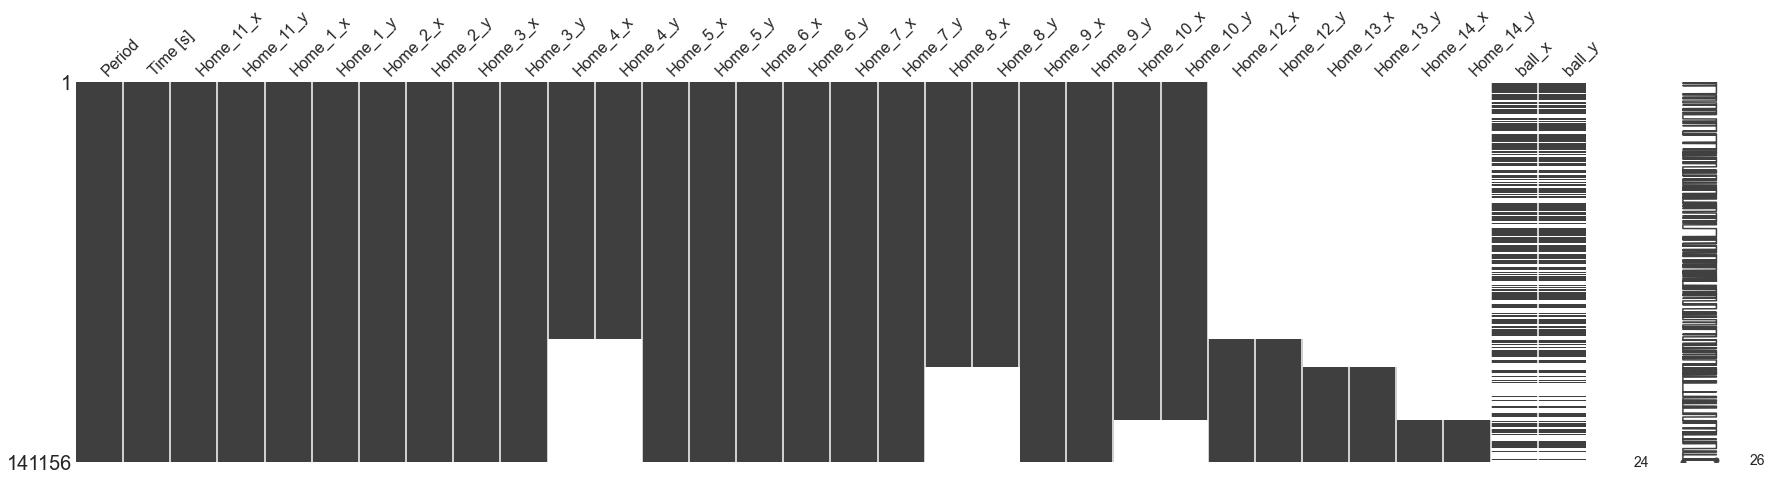

In [27]:
# Plot visualisation of the missing values for each feature of the raw DataFrame, df_tracking_home
msno.matrix(df_tracking_home, figsize = (30, 7))

In [28]:
# Counts of missing values
tm_bio_null_value_stats = df_tracking_home.isnull().sum(axis=0)
tm_bio_null_value_stats[tm_bio_null_value_stats != 0]

Home_4_x      45453
Home_4_y      45453
Home_8_x      35045
Home_8_y      35045
Home_10_x     15418
Home_10_y     15418
Home_12_x     95702
Home_12_y     95702
Home_13_x    106110
Home_13_y    106110
Home_14_x    125737
Home_14_y    125737
ball_x        57884
ball_y        57884
dtype: int64

The visualisation shows us very quickly that there a few missing values in most of the columns, but the dataset is ready for us.

---

## <a id='#section4'>4. Data Engineering</a>
Before we answer the questions in the brief through [Exploratory Data Analysis (EDA)](#section5), we'll first need to clean and wrangle the datasets to a form that meet our needs.

### <a id='#section4.1'>4.1. Events Data</a>

#### <a id='#section4.1.1'>4.1.1. Convert coordinates</a>
Convert Metrica's 0-1 coordinate system to a 106 by 86 coordinate system using the `to_metric_coordinates` function from the Metrica IO (mio) library.

##### Original coordinates 

![title](../../../../img/metrica_pitch_dimensions_original.png)


##### Converted coordinates

![title](../../../../img/metrica_pitch_dimensions_converted.png)

In [29]:
# Unit conversion from metric data units to meters
df_events = mio.to_metric_coordinates(df_events)

#### <a id='#section4.1.2'>4.1.2. Subset DataFrames</a>
Subsetted Events DataFrame for Home and Away, Shots, Goals, Passes. These subsets are all used throughout the Data Analysis section.

##### <a id='#section4.1.2.1'>4.1.2.1. Separate Home and Away Events DataFrames</a>

In [30]:
# Create seperate Events DataFrames for each team
df_home_events = df_events[df_events['Team'] == 'Home']
df_away_events = df_events[df_events['Team'] == 'Away']

In [31]:
# Freqeuency of Events of the Home team
df_home_events['Type'].value_counts()

PASS              543
CHALLENGE         160
RECOVERY          135
BALL LOST         120
SET PIECE          34
BALL OUT           27
SHOT               13
FAULT RECEIVED      9
CARD                3
Name: Type, dtype: int64

In [32]:
# Freqeuency of Events of the Away team
df_away_events['Type'].value_counts()

PASS              421
CHALLENGE         151
BALL LOST         113
RECOVERY          113
SET PIECE          46
BALL OUT           22
SHOT               11
FAULT RECEIVED     11
CARD                3
Name: Type, dtype: int64

##### <a id='#section4.1.2.2'>4.1.2.2. Create Shots DataFrames</a>

In [33]:
# Create Shots DataFrames

## Create an (all) Shots DataFrame
df_shots = df_events[df_events['Type'] == "SHOT"]

## Create a Home Shots DataFrame
df_home_shots = df_home_events[df_home_events.Type == "SHOT"]

## Create a Home Shots DataFrame
df_away_shots = df_away_events[df_away_events.Type == "SHOT"]

In [34]:
# View Home Shots
df_home_shots.head()

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y
83,Home,SHOT,OFF TARGET-OUT,1,4419,176.76,4443,177.72,Player5,NaN,-39.22,18.36,-55.12,2.72
198,Home,SHOT,ON TARGET-GOAL,1,12202,488.08,12212,488.48,Player10,NaN,-47.70,-3.40,-54.06,-2.04
252,Home,SHOT,ON TARGET-SAVED,1,16484,659.36,16499,659.96,Player10,NaN,-41.34,11.56,-48.76,0.68
431,Home,SHOT,HEAD-OFF TARGET-OUT,1,27345,1093.80,27360,1094.40,Player3,NaN,-43.46,-6.12,-54.06,-6.12
472,Home,SHOT,ON TARGET-SAVED,1,29754,1190.16,29777,1191.08,Player4,NaN,-31.80,-13.60,-53.00,-2.72


In [35]:
# View Away Shots
df_away_shots.head()

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y
297,Away,SHOT,BLOCKED,1,18515,740.60,18520,740.80,Player22,NaN,31.80,10.20,38.16,11.56
823,Away,SHOT,ON TARGET-GOAL,1,53049,2121.96,53075,2123.00,Player24,NaN,44.52,2.72,54.06,1.36
962,Away,SHOT,OFF TARGET-HEAD-OUT,1,63362,2534.48,63372,2534.88,Player23,NaN,45.58,0.68,54.06,-6.80
980,Away,SHOT,ON TARGET-SAVED,1,64772,2590.88,64799,2591.96,Player20,NaN,28.62,-3.40,51.94,-2.04
1058,Away,SHOT,OFF TARGET-OUT,2,69887,2795.48,69927,2797.08,Player21,NaN,-30.74,-10.88,-56.18,8.16


##### View shot types

In [36]:
# Frequency of Events for Home Shots DataFrame
df_home_shots['Subtype'].value_counts()

ON TARGET-SAVED        4
HEAD-OFF TARGET-OUT    4
ON TARGET-GOAL         2
OFF TARGET-OUT         2
HEAD-ON TARGET-GOAL    1
Name: Subtype, dtype: int64

In [37]:
# Frequency of Events for Away Shots DataFrame
df_away_shots['Subtype'].value_counts()

OFF TARGET-OUT         3
ON TARGET-SAVED        2
ON TARGET-GOAL         2
BLOCKED                2
OFF TARGET-HEAD-OUT    1
HEAD-OFF TARGET-OUT    1
Name: Subtype, dtype: int64

##### View who took the shots

In [38]:
# Which player took Home Shots?
df_home_shots['From'].value_counts()

Player9     4
Player10    3
Player5     2
Player4     1
Player12    1
Player7     1
Player3     1
Name: From, dtype: int64

In [39]:
# Which player took Away Shots?
df_away_shots['From'].value_counts()

Player24     2
Player20     2
Player19     2
Player23     1
Player18     1
Player22     1
Player 26    1
Player21     1
Name: From, dtype: int64

##### <a id='#section4.1.2.3'>4.1.2.3. Create Goals DataFrames</a>

In [40]:
# Get goals
df_home_goals = df_home_shots[df_home_shots['Subtype'].str.contains('-GOAL')].copy()
df_away_goals = df_away_shots[df_away_shots['Subtype'].str.contains('-GOAL')].copy()

In [41]:
# View Home Goals
df_home_goals.head()

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y
198,Home,SHOT,ON TARGET-GOAL,1,12202,488.08,12212,488.48,Player10,NaN,-47.70,-3.40,-54.06,-2.04
1118,Home,SHOT,HEAD-ON TARGET-GOAL,2,73983,2959.32,73995,2959.80,Player9,NaN,47.70,-1.36,54.06,-2.04
1723,Home,SHOT,ON TARGET-GOAL,2,121027,4841.08,121055,4842.20,Player12,NaN,30.74,-5.44,54.06,-2.72


In [42]:
# View Home Goals
df_away_goals.head()

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y
823,Away,SHOT,ON TARGET-GOAL,1,53049,2121.96,53075,2123.00,Player24,NaN,44.52,2.72,54.06,1.36
1671,Away,SHOT,ON TARGET-GOAL,2,115009,4600.36,115024,4600.96,Player20,NaN,-40.28,-1.36,-55.12,-2.72


##### <a id='#section4.1.2.4'>4.1.2.4. Create Passes DataFrames</a>

In [43]:
# Create a DataFrame for all Home team passes
df_home_passes = df_events[(df_events['Type'].isin(['PASS'])) & (df_events['Team'] == 'Home')]
df_away_passes = df_events[(df_events['Type'].isin(['PASS'])) & (df_events['Team']=='Away') ]

In [44]:
# Print the shape of the Home Passes DataFrame
df_home_passes.shape

(543, 14)

There are 543 successful home passes in total.

In [45]:
# Print the shape of the Away Passes DataFrame
df_away_passes.shape

(421, 14)

There are 421 successful away passes in total.

### <a id='#section4.2'>4.2. Tracking Data</a>

#### <a id='#section4.2.1'>4.2.1. Convert coordinates</a>
As per the Event data, convert Metrica's 0-1 coordinate system to a 106 by 86 coordinate system.

In [46]:
# Convert to pitch coordinates
df_tracking_home = mio.to_metric_coordinates(df_tracking_home)
df_tracking_away = mio.to_metric_coordinates(df_tracking_away)

In [47]:
df_tracking_home.head()

,Period,Time [s],Home_11_x,Home_11_y,Home_1_x,Home_1_y,Home_2_x,Home_2_y,Home_3_x,Home_3_y,Home_4_x,Home_4_y,Home_5_x,Home_5_y,Home_6_x,Home_6_y,Home_7_x,Home_7_y,Home_8_x,Home_8_y,Home_9_x,Home_9_y,Home_10_x,Home_10_y,Home_12_x,Home_12_y,Home_13_x,Home_13_y,Home_14_x,Home_14_y,ball_x,ball_y
Frame,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1,0.04,46.9315,-0.28084,15.70072,14.5486,18.81712,4.89396,21.07492,-3.81208,15.20888,-17.85204,-28.26066,16.40908,10.88514,1.77004,9.01848,-2.05156,3.35278,-17.05712,0.67522,13.50684,0.20564,-7.56364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,0.08,46.9315,-0.28084,15.70072,14.5486,18.81712,4.89396,21.07492,-3.81208,15.20888,-17.85204,-28.26066,16.40908,10.88514,1.77004,9.01848,-2.05156,3.35278,-17.05712,0.67522,13.50684,0.20564,-7.56364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,0.12,46.9315,-0.28084,15.70072,14.5486,18.81712,4.89396,21.07492,-3.81208,15.20888,-17.85204,-28.26066,16.40908,10.88514,1.77004,9.01848,-2.05156,3.35278,-17.05712,0.67522,13.50684,0.20564,-7.56364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,0.16,46.9315,-0.28084,15.70072,14.5486,18.81712,4.89396,21.07492,-3.81208,15.20888,-17.85204,-28.35076,16.40840,10.88514,1.77004,9.01848,-2.05156,3.35278,-17.05712,0.67522,13.50684,0.20564,-7.56364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1,0.20,46.9315,-0.28084,15.70072,14.5486,18.81712,4.89396,21.07492,-3.81208,15.20888,-17.85204,-28.43980,16.40772,10.88514,1.77004,9.01848,-2.05156,3.35278,-17.05712,0.67522,13.50684,0.20564,-7.56364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
df_tracking_away.head()

,Period,Time [s],Away_25_x,Away_25_y,Away_15_x,Away_15_y,Away_16_x,Away_16_y,Away_17_x,Away_17_y,Away_18_x,Away_18_y,Away_19_x,Away_19_y,Away_20_x,Away_20_y,Away_21_x,Away_21_y,Away_22_x,Away_22_y,Away_23_x,Away_23_y,Away_24_x,Away_24_y,Away_26_x,Away_26_y,ball_x,ball_y
Frame,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1,0.04,-51.70892,-1.19884,-18.13554,-21.65528,-20.42196,-3.52376,-18.8309,7.51128,-14.3047,12.88668,-0.46216,-28.12752,-10.79928,1.89176,-7.08822,12.67928,-0.11766,35.53884,0.18762,-0.0986,-0.51198,9.36088,NaN,NaN,NaN,NaN
2,1,0.08,-51.70892,-1.19884,-18.13554,-21.65528,-20.42196,-3.52376,-18.8309,7.51128,-14.3047,12.88668,-0.46216,-28.12752,-10.79928,1.89176,-7.08822,12.67928,-0.11766,35.53884,0.18762,-0.0986,-0.51198,9.36088,NaN,NaN,NaN,NaN
3,1,0.12,-51.70892,-1.19884,-18.13554,-21.65528,-20.42196,-3.52376,-18.8309,7.51128,-14.3047,12.88668,-0.46216,-28.12752,-10.79928,1.89176,-7.08822,12.67928,-0.11766,35.53884,0.18762,-0.0986,-0.51198,9.36088,NaN,NaN,NaN,NaN
4,1,0.16,-51.70892,-1.19884,-18.19384,-21.65596,-20.42196,-3.52376,-18.8309,7.51128,-14.3047,12.88668,-0.46216,-28.12752,-10.79928,1.89176,-7.08822,12.67928,-0.11766,35.53884,0.18762,-0.0986,-0.51198,9.36088,NaN,NaN,NaN,NaN
5,1,0.20,-51.70892,-1.19884,-18.25002,-21.65596,-20.42196,-3.52376,-18.8309,7.51128,-14.3047,12.88668,-0.46216,-28.12752,-10.79928,1.89176,-7.08822,12.67928,-0.11766,35.53884,0.18762,-0.0986,-0.51198,9.36088,NaN,NaN,NaN,NaN


#### <a id='#section4.2.2'>4.2.2. Calculate player velocities</a>
Determine the velocity of each player at a given timestep using the `calc_player_velocities` function from the `mvel` library.

In [49]:
# Calculate player velocities
df_tracking_home = mvel.calc_player_velocities(df_tracking_home, smoothing=True, filter_='moving_average')
df_tracking_away = mvel.calc_player_velocities(df_tracking_away, smoothing=True, filter_='moving_average')

"""
**** NOTE *****
if the lines above produce an error (happens for one version of numpy) change them to the lines below:
***************
tracking_home = mvel.calc_player_velocities(df_tracking_home, smoothing=True, filter_='moving_average')
tracking_away = mvel.calc_player_velocities(df_tracking_away, smoothing=True, filter_='moving_average')
"""

"\n**** NOTE *****\nif the lines above produce an error (happens for one version of numpy) change them to the lines below:\n***************\ntracking_home = mvel.calc_player_velocities(df_tracking_home, smoothing=True, filter_='moving_average')\ntracking_away = mvel.calc_player_velocities(df_tracking_away, smoothing=True, filter_='moving_average')\n"

This can be explored in the `df_tracking_home` and `df_tracking_away` DataFrames using the variable explorer where we can see the additional columns for velocity have been added to the DataFrame. These columns are of the following, but for all the players:
*    `Away_15_vx`
*    `Away_15_vy`
*    `Away_15_speed` i.e. total speed

These new metricas are all measured in meters per second.

#### <a id='#section4.2.3'>4.2.3. Reverse direction of players</a>
Reverse direction of a player so that home team is alway attacking right->left i.e. no switch at half time

In [50]:
# Reverse direction of a player so that home team is alway attacking right->left i.e. no switch at half time
df_tracking_home, df_tracking_away, df_events = mio.to_single_playing_direction(df_tracking_home, df_tracking_away, df_events)

#### <a id='#section4.2.4'>4.2.4. Find playing direction

In [51]:
home_attack_direction = mio.find_playing_direction (df_tracking_home, 'Home')

---

## <a id='#section5'>5. Exploratory Data Analysis</a>

*    [Plotting shot and pass maps using Event and Tracking data (5.2.1)](#section5.2.1)<br>
*    [Measureing the physical performance of players (5.2.2)](#section5.2.2)<br>
     + [Player velocities](#section5.2.1.1)<br>
     + [Creating bespoke physical summary reports](#section5.2.1.2)<br>
*    [Pitch Control models (5.2.3)](#section5.2.3)<br>
     + [Implementing a Pitch Control model](#section5.2.3.1)<br>
     + [Evaluating pass options](#section5.2.3.2)<br>
*    [Valuing player actions through and Expected Possession Value (EPV model) (5.2.4)](#section5.2.4)<br>

### <a id='#section5.1'>5.1. Plotting shot and pass maps using Event and Tracking data</a>

#### <a id='#section5.1.1'>5.1.1. Visualisation of Shots and Build Up Play for Goals using Event data</a>

##### <a id='#section5.1.1.1'>5.1.1.1. Look at first goal - what happened?</a>

Text(-47.7, -3.400000000000003, '')

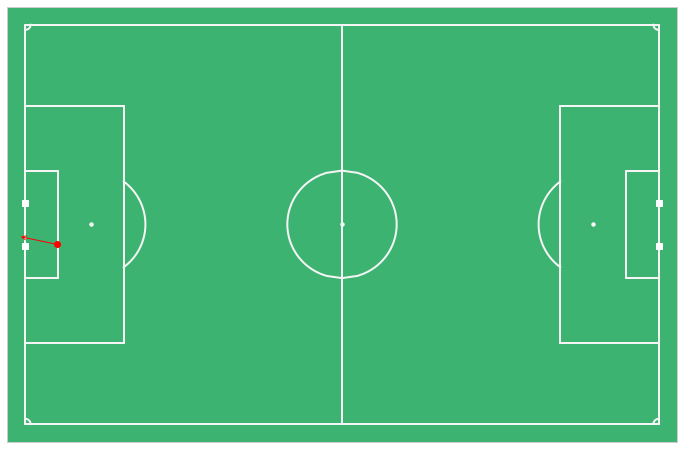

In [52]:
# Visualisation of first goal

## Define index of first goal
index_first_goal = 198

## Visualise shots using plot_events function from mviz library
fig, ax = mviz.plot_pitch()
ax.plot(df_events.loc[index_first_goal]['Start X'], df_events.loc[index_first_goal]['Start Y'], 'ro')
ax.annotate("", xy = df_events.loc[index_first_goal][['End X','End Y']], xytext = df_events.loc[index_first_goal][['Start X','Start Y']], alpha=0.6, arrowprops = dict(arrowstyle = "->", color='r'))

##### Visualise pass move in run up to goal

(<Figure size 864x576 with 1 Axes>, <AxesSubplot:>)

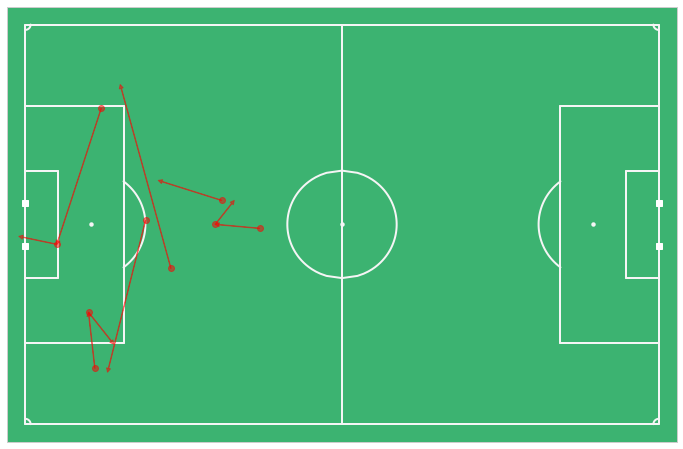

In [53]:
# Visualise pass move in run up to goal

## Define index of first goal
index_first_pass = 190
index_goal = 198

## Visualise shots using plot_events function from mviz library
mviz.plot_events(df_events.loc[index_first_pass:index_goal], indicators = ['Marker', 'Arrow'])

(<Figure size 864x576 with 1 Axes>, <AxesSubplot:>)

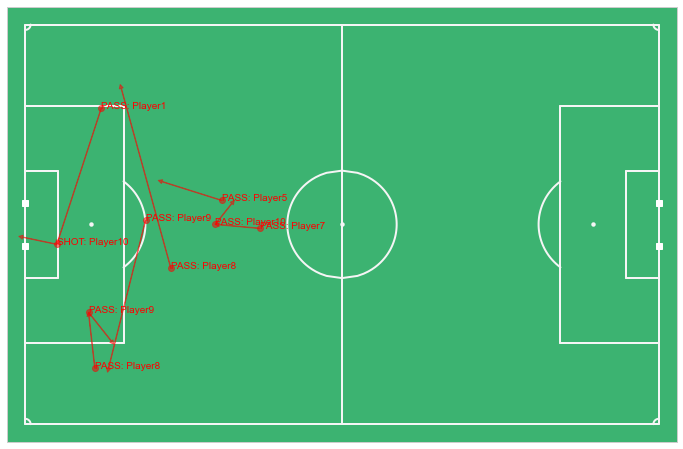

In [54]:
# Visualise pass move in run up to goal with annotations

## Define index of first goal
index_first_pass = 190
index_goal = 198

## Visualise shots using plot_events function from mviz library
mviz.plot_events(df_events.loc[index_first_pass:index_goal], indicators = ['Marker', 'Arrow'], annotate=True)    # show player names

##### <a id='#section5.1.1.2'>5.1.1.2. Plot the pases and shot leading up to the second and third goals in the match

In [55]:
# Get goals

## Filter Events DataFrame for Shots that are Goals
df_goals = df_events[(df_events['Type'] == "SHOT") & (df_shots['Subtype'].str.contains('-GOAL'))]

## Display DataFrame
df_goals.head(5)    # five goals

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y
198,Home,SHOT,ON TARGET-GOAL,1,12202,488.08,12212,488.48,Player10,NaN,-47.70,-3.40,-54.06,-2.04
823,Away,SHOT,ON TARGET-GOAL,1,53049,2121.96,53075,2123.00,Player24,NaN,44.52,2.72,54.06,1.36
1118,Home,SHOT,HEAD-ON TARGET-GOAL,2,73983,2959.32,73995,2959.80,Player9,NaN,-47.70,1.36,-54.06,2.04
1671,Away,SHOT,ON TARGET-GOAL,2,115009,4600.36,115024,4600.96,Player20,NaN,40.28,1.36,55.12,2.72
1723,Home,SHOT,ON TARGET-GOAL,2,121027,4841.08,121055,4842.20,Player12,NaN,-30.74,5.44,-54.06,2.72


From the goals DataFrame, we can see that there were five goals in the game, with the home team winning 3-2.

From the DataFrames, We can see the goals were scored in the following frames:
*    Goal 1: 198
*    Goal 2: 823
*    Goal 3: 1,118
*    Goal 4: 1,671
*    Goal 5: 1,723

At this point, can use the [variable inspector](https://github.com/lckr/jupyterlab-variableInspector) available in Jupyter Lab, or view the CSV in Excel, to view the Events DataFrame, `df_events`, and see where the moves began.

##### Second goal
From the DataFrame for events, `df_events`, we can see that for the second goal for the away team (blue) there were five passes leading up the shot, started from frame 818, which resulted in a goal in frame 823.

(<Figure size 864x576 with 1 Axes>, <AxesSubplot:>)

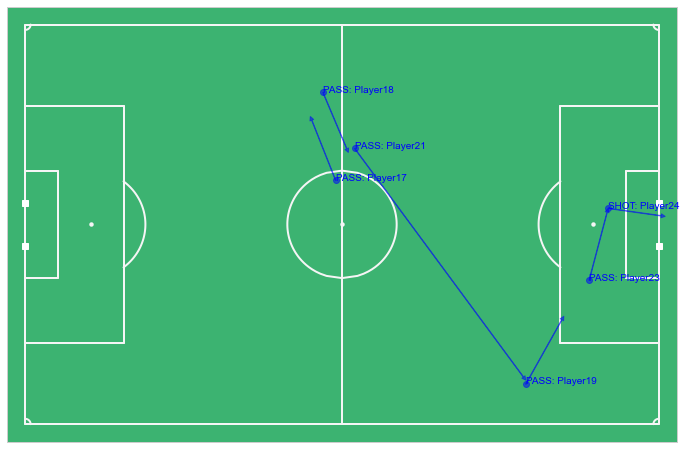

In [56]:
# Visualise pass move in run up to the second goal

## Define index of second goal
index_second_goal_initial_pass = 818
index_second_goal = 823

## Visualise pass move in run up to the second goal for the away team (blue) - frames 818 to 823
mviz.plot_events(df_events.loc[index_second_goal_initial_pass:index_second_goal ], indicators = ['Marker', 'Arrow'], annotate=True, color='b')

##### Third goal
From the DataFrame for events, `df_events`, we can see that for the third goal for the home team (red) there were five passes leading up the shot, started from frame 1,109, which resulted in a goal in frame 1,118.

In [57]:
"""
Matplotlib issue here for some reason - 'path' is not a valid quadratic Bezier curve, need to fix this

# Visualise pass move in run up to the third goal

## Define index of third goal
index_third_goal_initial_pass = 1_109
index_third_goal = 1_118

## Visualise shots using plot_events function from mviz library - frames 1,109 to 1,118
mviz.plot_events(df_events.loc[index_third_goal_initial_pass:index_third_goal], indicators = ['Marker', 'Arrow'], annotate=True, color='r')
"""

"\nMatplotlib issue here for some reason - 'path' is not a valid quadratic Bezier curve, need to fix this\n\n# Visualise pass move in run up to the third goal\n\n## Define index of third goal\nindex_third_goal_initial_pass = 1_109\nindex_third_goal = 1_118\n\n## Visualise shots using plot_events function from mviz library - frames 1,109 to 1,118\nmviz.plot_events(df_events.loc[index_third_goal_initial_pass:index_third_goal], indicators = ['Marker', 'Arrow'], annotate=True, color='r')\n"

In parts the goal seems a little obscure, that's because there were a couple of challenges leading up to the goal, as well as the passes and shots.

We can maken this a little clearer by filtering the event data only for passes and shots, as the following:

In [58]:
# Filtering the event data only for passes and shots
df_passes_and_shots = df_events[df_events['Type'].isin(['SHOT', 'PASS'])]

(<Figure size 864x576 with 1 Axes>, <AxesSubplot:>)

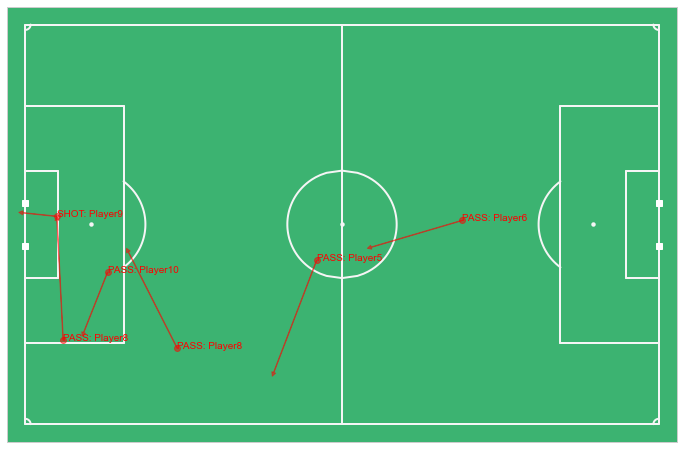

In [59]:
# Visualise shots using plot_events function from mviz library - frames 1,109 to 1,118
mviz.plot_events(df_passes_and_shots.loc[1_109:1_118], indicators = ['Marker', 'Arrow'], annotate=True, color='r')

##### <a id='#section5.1.1.3'>5.1.1.3. Plot all the shots by Player 9 of the home team. Use a different symbol and transparency (alpha) for shots that resulted in goals.
To do this, the shots of player 9 are separated into two DataFrames - goal or not goal, and then these DataFrames have different visual properties when plotted using the `plot_events` function from th `mviz` library.

In [60]:
# Filter Events DataFrame for all player 9 of the Home team's shots
df_home_player9_shots = df_events[(df_events['Team'] == 'Home') & (df_events['Type'] == 'SHOT') & (df_events['From'] == 'Player9')]

In [61]:
# Display DataFrame
df_home_player9_shots.head()

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y
1118,Home,SHOT,HEAD-ON TARGET-GOAL,2,73983,2959.32,73995,2959.8,Player9,NaN,-47.70,1.36,-54.06,2.04
1681,Home,SHOT,HEAD-OFF TARGET-OUT,2,117218,4688.72,117245,4689.8,Player9,NaN,-41.34,7.48,-54.06,-5.44
1756,Home,SHOT,HEAD-OFF TARGET-OUT,2,124336,4973.44,124365,4974.6,Player9,NaN,-45.58,0.00,-55.12,7.48
1927,Home,SHOT,ON TARGET-SAVED,2,139891,5595.64,139925,5597.0,Player9,NaN,-21.20,1.36,-50.88,1.36


We can see from the DataFrame that player 9 of the Home team had 4 shots - 1 goal, 2 off-target and 1 saved by the goalkeeper.

In [62]:
# Using the home_player9_shots DataFrame, create two DataFrames that seperates those shots that are goals and those that are not goals
df_home_player9_shots_goal = df_home_player9_shots[df_home_player9_shots['Subtype'].str.contains('-GOAL')]
df_home_player9_shots_nogoal = df_home_player9_shots[~df_home_player9_shots['Subtype'].str.contains('-GOAL')]

In [63]:
# Display DataFrame
df_home_player9_shots_goal.head()

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y
1118,Home,SHOT,HEAD-ON TARGET-GOAL,2,73983,2959.32,73995,2959.8,Player9,NaN,-47.7,1.36,-54.06,2.04


In [64]:
# Display DataFrame
df_home_player9_shots_nogoal.head()

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y
1681,Home,SHOT,HEAD-OFF TARGET-OUT,2,117218,4688.72,117245,4689.8,Player9,NaN,-41.34,7.48,-54.06,-5.44
1756,Home,SHOT,HEAD-OFF TARGET-OUT,2,124336,4973.44,124365,4974.6,Player9,NaN,-45.58,0.00,-55.12,7.48
1927,Home,SHOT,ON TARGET-SAVED,2,139891,5595.64,139925,5597.0,Player9,NaN,-21.20,1.36,-50.88,1.36


Text(0.5, 0.92, 'Home team Player9 shots')

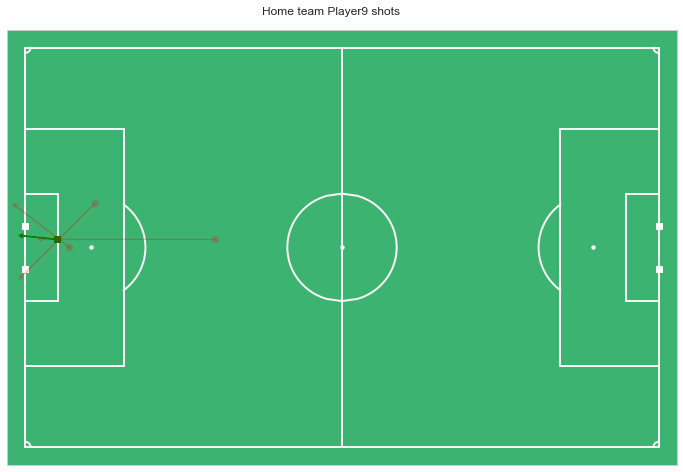

In [65]:
# Visualisation of all player 9's shots using plot_events function from mviz library
fig,ax = mviz.plot_events(df_home_player9_shots_goal, indicators = ['Marker', 'Arrow'], annotate = False, color = 'g', alpha= 1, marker_style = "s")
mviz.plot_events(df_home_player9_shots_nogoal, figax = (fig,ax), indicators = ['Marker', 'Arrow'], annotate = False, color = 'r', alpha = 0.2, marker_style = "o")
fig.suptitle('Home team Player9 shots', y = 0.92)

#### <a id='#section5.1.2'>5.1.2. Visualise the positions of all players at the time a goal is scored using Tracking data</a>

##### <a id='#section5.1.2.1'>5.1.2.1. Visualisation of the first 60 seconds of the match</a>

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  after removing the cwd from sys.path.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  """
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher

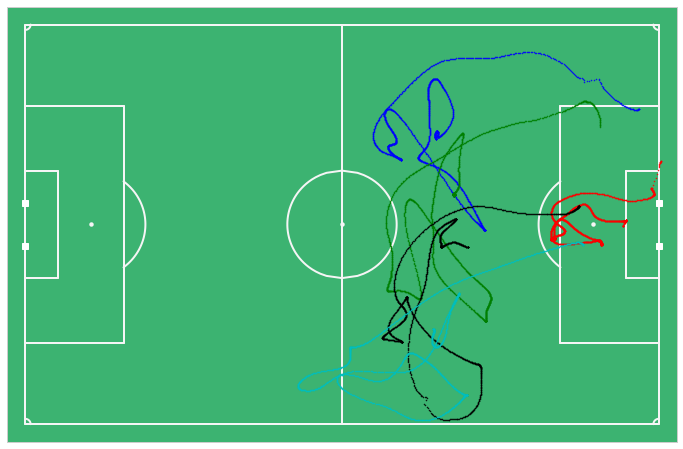

In [66]:
# Plotting tracking data -  of the first 60 seconds (i.e. 60 x 90 = 1500 frames)
fig,ax = mviz.plot_pitch()
ax.plot(df_tracking_home['Home_11_x'].iloc[:1500], df_tracking_home['Home_11_y'].iloc[:1500], 'r.', MarkerSize=1)
ax.plot(df_tracking_home['Home_1_x'].iloc[:1500], df_tracking_home['Home_1_y'].iloc[:1500], 'b.', MarkerSize=1)
ax.plot(df_tracking_home['Home_2_x'].iloc[:1500], df_tracking_home['Home_2_y'].iloc[:1500], 'g.', MarkerSize=1)
ax.plot(df_tracking_home['Home_3_x'].iloc[:1500], df_tracking_home['Home_3_y'].iloc[:1500], 'k.', MarkerSize=1)
ax.plot(df_tracking_home['Home_4_x'].iloc[:1500], df_tracking_home['Home_4_y'].iloc[:1500], 'c.', MarkerSize=1)

The red line represents the goalkeeper and the four players in front are most likely the back four.

##### Visualise positions of the players at kick off
Visualisation uses the `plot_frame` function from mviz library, which separates the x and y coordinates of all the players in a frame

/Users/eddwebster/Documents/Programming/Projects by Type/Football/notebooks/C) Data Analysis/Tracking Data Projects/Metrica Sports/Metrica_Viz.py:141: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
/Users/eddwebster/Documents/Programming/Projects by Type/Football/notebooks/C) Data Analysis/Tracking Data Projects/Metrica Sports/Metrica_Viz.py:141: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
/Users/eddwebster/Documents/Programming/Projects by Type/Football/notebooks/C) Data Analysis/Tracking Data Projects/Metrica Sports/Metrica_Viz.py:149: MatplotlibDeprecation

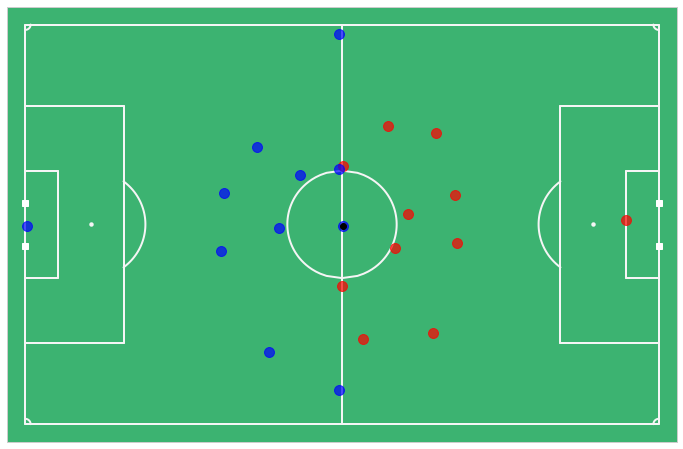

In [67]:
# Visualise positions of the players at kick off

## Define index of kick off - found from the Event data, which is in sync with the Tracking data
index_kick_off = 51

## Visualise positions of the players at kick off using plot_frame function from mviz library, which separates the x and y coordinates of all the players in a frame
fix,ax = mviz.plot_frame(df_tracking_home.loc[index_kick_off], df_tracking_away.loc[index_kick_off])

##### Visualise positions of the players at the goal

/Users/eddwebster/Documents/Programming/Projects by Type/Football/notebooks/C) Data Analysis/Tracking Data Projects/Metrica Sports/Metrica_Viz.py:141: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
/Users/eddwebster/Documents/Programming/Projects by Type/Football/notebooks/C) Data Analysis/Tracking Data Projects/Metrica Sports/Metrica_Viz.py:141: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
/Users/eddwebster/Documents/Programming/Projects by Type/Football/notebooks/C) Data Analysis/Tracking Data Projects/Metrica Sports/Metrica_Viz.py:149: MatplotlibDeprecation

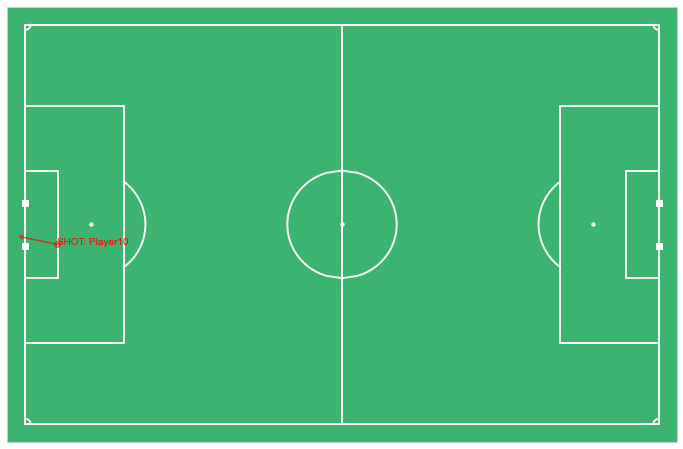

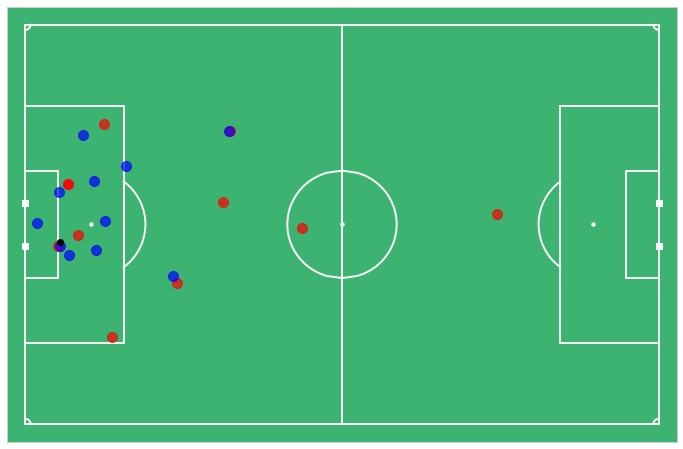

In [68]:
# Visualise positions of the players at the goal

## Define index of Event data and frame of Tracking data of first goal
index_first_goal = 198
frame_first_goal = df_events.loc[index_goal]['Start Frame']    # frame in the tracking data where first goal took place - 12,202


## Visualise shots using plot_events function from mviz library

### Shot postions
fix,ax = mviz.plot_events(df_events.loc[index_first_goal:index_first_goal], indicators = ['Marker', 'Arrow'], annotate=True)

### Player's positions
fig,ax = mviz.plot_frame(df_tracking_home.loc[frame_first_goal], df_tracking_away.loc[frame_first_goal])

##### <a id='#section5.1.2.2'>5.1.2.2. Plot the positions of all players at Player 9's goal</a>

/Users/eddwebster/Documents/Programming/Projects by Type/Football/notebooks/C) Data Analysis/Tracking Data Projects/Metrica Sports/Metrica_Viz.py:141: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
/Users/eddwebster/Documents/Programming/Projects by Type/Football/notebooks/C) Data Analysis/Tracking Data Projects/Metrica Sports/Metrica_Viz.py:141: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
/Users/eddwebster/Documents/Programming/Projects by Type/Football/notebooks/C) Data Analysis/Tracking Data Projects/Metrica Sports/Metrica_Viz.py:149: MatplotlibDeprecation

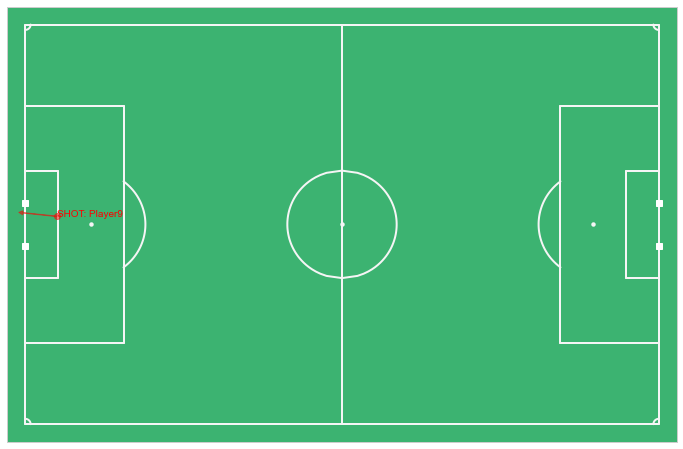

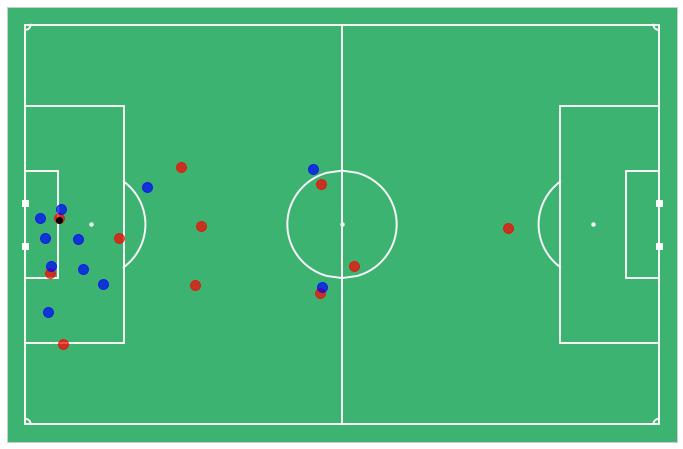

In [69]:
# Visualise positions of the players at the goal

## Define index of Event data and frame of Tracking data of first goal
index_second_goal = 1_118
frame_second_goal = df_events.loc[index_second_goal]['Start Frame']    # frame in the tracking data where first goal took place - 12,202

## Visualise shots using plot_events function from mviz library

### Shot postions
fix,ax = mviz.plot_events(df_events.loc[index_second_goal:index_second_goal], indicators = ['Marker', 'Arrow'], annotate=True)

### Player's positions
fig,ax = mviz.plot_frame(df_tracking_home.loc[frame_second_goal], df_tracking_away.loc[frame_second_goal])

### <a id='#section5.2'>5.2. Measuring the physical performance of players</a>

#### <a id='#section5.2.1'>5.2.1. Calculate how far each player ran</a>

In [70]:
# Look through home and away teams seperately

##
teams = ['Home', 'Away']

##
data = [df_tracking_home, df_tracking_away]

##
for name, data in zip(teams, data):
    team_players = np.unique([c.split('_')[1] for c in data.columns if c[:4] == name])
    team_summary = pd.DataFrame(index = team_players)
    
    # Calculate total distance covered for each player
    distance = []
    for player in team_summary.index:
        column = name + '_' + player + '_speed'
        player_distance = data[column].sum()/25./1000 # this is the sum of the distance travelled from one observation to another
        distance.append(player_distance)
        
    team_summary['Distance [km]'] = distance
    team_summary = team_summary.sort_values(['Distance [km]'], ascending = False)
    
    print("****** " + name + " team summary ******")
    print(team_summary)

****** Home team summary ******
    Distance [km]
5       11.979224
6       11.573299
7       11.108719
1       10.418124
2        9.896841
9        9.803775
3        9.591745
8        9.046879
10       9.019024
4        7.211761
11       5.237010
12       3.060129
13       2.386500
14       1.092238
****** Away team summary ******
    Distance [km]
19      11.184492
20      10.889868
18      10.424524
15      10.107176
21      10.051331
24       9.940051
23       9.696137
16       9.538034
17       9.355303
22       6.378535
26       3.773752
25       3.616464


In [71]:
## Display Team Summary DataFrame
team_summary

,Distance [km]
19,11.184492
20,10.889868
18,10.424524
15,10.107176
21,10.051331
24,9.940051
23,9.696137
16,9.538034
17,9.355303
22,6.378535


TypeError: 'method' object is not subscriptable

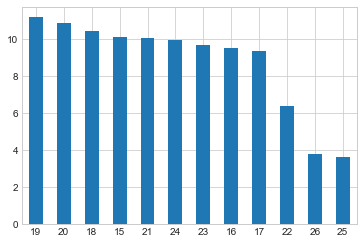

In [72]:
# make a simple bar chart of distance covered for each player
fig, ax = plt.subplots()
ax = team_summary['Distance [km]'].plot.bar(rot=0)
ax.set_xlabel['Player']
ax.set_ylabel['Distance covered [km]']
fig.suptitle(name + ' Team', y=0.95)

#### <a id='#section5.2.2'>5.2.2. Create MP4 videos of moments in play</a>

##### <a id='#section5.2.2.1'>5.2.3.1. MP4 video of the 2nd Home goal</a>

In [75]:
df_tracking_home

,Period,Time [s],Home_11_x,Home_11_y,Home_1_x,Home_1_y,Home_2_x,Home_2_y,Home_3_x,Home_3_y,Home_4_x,Home_4_y,Home_5_x,Home_5_y,Home_6_x,Home_6_y,Home_7_x,Home_7_y,Home_8_x,Home_8_y,Home_9_x,Home_9_y,Home_10_x,Home_10_y,Home_12_x,Home_12_y,Home_13_x,Home_13_y,Home_14_x,Home_14_y,ball_x,ball_y,Home_1_vx,Home_1_vy,Home_1_speed,Home_10_vx,Home_10_vy,Home_10_speed,Home_11_vx,Home_11_vy,Home_11_speed,Home_12_vx,Home_12_vy,Home_12_speed,Home_13_vx,Home_13_vy,Home_13_speed,Home_14_vx,Home_14_vy,Home_14_speed,Home_2_vx,Home_2_vy,Home_2_speed,Home_3_vx,Home_3_vy,Home_3_speed,Home_4_vx,Home_4_vy,Home_4_speed,Home_5_vx,Home_5_vy,Home_5_speed,Home_6_vx,Home_6_vy,Home_6_speed,Home_7_vx,Home_7_vy,Home_7_speed,Home_8_vx,Home_8_vy,Home_8_speed,Home_9_vx,Home_9_vy,Home_9_speed
Frame,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1,0.04,46.9315,-0.28084,15.70072,14.54860,18.81712,4.89396,21.07492,-3.81208,15.20888,-17.85204,-28.26066,16.40908,10.88514,1.77004,9.01848,-2.05156,3.35278,-17.05712,0.67522,13.50684,0.20564,-7.56364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,0.08,46.9315,-0.28084,15.70072,14.54860,18.81712,4.89396,21.07492,-3.81208,15.20888,-17.85204,-28.26066,16.40908,10.88514,1.77004,9.01848,-2.05156,3.35278,-17.05712,0.67522,13.50684,0.20564,-7.56364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.000,0.000000,0.0000,0.000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.000,0.000000
3,1,0.12,46.9315,-0.28084,15.70072,14.54860,18.81712,4.89396,21.07492,-3.81208,15.20888,-17.85204,-28.26066,16.40908,10.88514,1.77004,9.01848,-2.05156,3.35278,-17.05712,0.67522,13.50684,0.20564,-7.56364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.000,0.000000,0.0000,0.000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.000,0.000000
4,1,0.16,46.9315,-0.28084,15.70072,14.54860,18.81712,4.89396,21.07492,-3.81208,15.20888,-17.85204,-28.35076,16.40840,10.88514,1.77004,9.01848,-2.05156,3.35278,-17.05712,0.67522,13.50684,0.20564,-7.56364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.2525,-0.017,2.252564,0.0000,0.000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.000,0.000000
5,1,0.20,46.9315,-0.28084,15.70072,14.54860,18.81712,4.89396,21.07492,-3.81208,15.20888,-17.85204,-28.43980,16.40772,10.88514,1.77004,9.01848,-2.05156,3.35278,-17.05712,0.67522,13.50684,0.20564,-7.56364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.2260,-0.017,2.226065,0.0000,0.000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141152,2,5646.08,46.3379,0.84524,12.19106,-23.55792,29.08852,-5.87860,24.22948,-12.09788,NaN,NaN,9.97248,-28.55864,11.75010,4.36084,14.61104,4.22824,NaN,NaN,22.86844,-9.62540,NaN,NaN,9.71278,-24.17468,-1.09392,30.29672,23.36028,-9.04400,NaN,NaN,-0.0,-0.0,0.0,NaN,NaN,NaN,-0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0530,1.513,1.513928,-1.0865,0.391,1.154713,-0.0,-0.0,0.0,-0.0,-0.0,0.0,NaN,NaN,NaN,-0.0000,-0.000,0.000000,-1.1925,-0.748,1.407679,-0.0,-0.0,0.0,NaN,NaN,NaN,1.6430,0.578,1.741704
141153,2,5646.12,46.3379,0.84524,12.19106,-23.55792,29.08852,-5.87860,24.22948,-12.09788,NaN,NaN,9.97248,-28.55864,11.69710,4.34860,14.61104,4.22824,NaN,NaN,22.93310,-9.56556,NaN,NaN,9.71278,-24.17468,-1.09286,30.34568,23.31046,-9.

In [73]:
# Create MP4 video of the 2nd Home goal

## Define frames for the start and end of the goal
frame_start_first_goal = 73600
frame_end_first_goal = frame_start_first_goal+500

## Visualise tracking data using save_match_clip function from mviz library
mviz.save_match_clip(df_tracking_home.iloc[73600:73600+500], df_tracking_away.iloc[73600:73600+500], video_dir + '/metrica-sports_tracking', fname = 'home_goal_2', include_player_velocities=False)

Generating movie...

/Users/eddwebster/Documents/Programming/Projects by Type/Football/notebooks/C) Data Analysis/Tracking Data Projects/Metrica Sports/Metrica_Viz.py:199: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  objs, = ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
/Users/eddwebster/Documents/Programming/Projects by Type/Football/notebooks/C) Data Analysis/Tracking Data Projects/Metrica Sports/Metrica_Viz.py:199: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  objs, = ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
/Users/eddwebster/Documents/Programming/Projects by Type/Football/notebooks/C) Data Analysis/Tracking Data Projects/Metrica Sports/Metrica_Viz.py:207: Matpl

/Users/eddwebster/Documents/Programming/Projects by Type/Football/notebooks/C) Data Analysis/Tracking Data Projects/Metrica Sports/Metrica_Viz.py:199: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  objs, = ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
/Users/eddwebster/Documents/Programming/Projects by Type/Football/notebooks/C) Data Analysis/Tracking Data Projects/Metrica Sports/Metrica_Viz.py:199: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  objs, = ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
/Users/eddwebster/Documents/Programming/Projects by Type/Football/notebooks/C) Data Analysis/Tracking Data Projects/Metrica Sports/Metrica_Viz.py:207: Matpl

/Users/eddwebster/Documents/Programming/Projects by Type/Football/notebooks/C) Data Analysis/Tracking Data Projects/Metrica Sports/Metrica_Viz.py:199: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  objs, = ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
/Users/eddwebster/Documents/Programming/Projects by Type/Football/notebooks/C) Data Analysis/Tracking Data Projects/Metrica Sports/Metrica_Viz.py:207: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  objs, = ax.plot( team['ball_x'], team['ball_y'], 'ko', MarkerSize=6, alpha=1.0, LineWidth=0)
/Users/eddwebster/Documents/Programming/Projects by Type/Football/notebooks/C) Data Analysis/Tracking Data Projects/Metrica Sports/Metrica_Viz.py:199: MatplotlibDeprecationWarning: Case-insensitive 

/Users/eddwebster/Documents/Programming/Projects by Type/Football/notebooks/C) Data Analysis/Tracking Data Projects/Metrica Sports/Metrica_Viz.py:199: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  objs, = ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
/Users/eddwebster/Documents/Programming/Projects by Type/Football/notebooks/C) Data Analysis/Tracking Data Projects/Metrica Sports/Metrica_Viz.py:199: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  objs, = ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
/Users/eddwebster/Documents/Programming/Projects by Type/Football/notebooks/C) Data Analysis/Tracking Data Projects/Metrica Sports/Metrica_Viz.py:207: Matpl

/Users/eddwebster/Documents/Programming/Projects by Type/Football/notebooks/C) Data Analysis/Tracking Data Projects/Metrica Sports/Metrica_Viz.py:199: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  objs, = ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
/Users/eddwebster/Documents/Programming/Projects by Type/Football/notebooks/C) Data Analysis/Tracking Data Projects/Metrica Sports/Metrica_Viz.py:199: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  objs, = ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
/Users/eddwebster/Documents/Programming/Projects by Type/Football/notebooks/C) Data Analysis/Tracking Data Projects/Metrica Sports/Metrica_Viz.py:207: Matpl

/Users/eddwebster/Documents/Programming/Projects by Type/Football/notebooks/C) Data Analysis/Tracking Data Projects/Metrica Sports/Metrica_Viz.py:199: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  objs, = ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
/Users/eddwebster/Documents/Programming/Projects by Type/Football/notebooks/C) Data Analysis/Tracking Data Projects/Metrica Sports/Metrica_Viz.py:199: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  objs, = ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
/Users/eddwebster/Documents/Programming/Projects by Type/Football/notebooks/C) Data Analysis/Tracking Data Projects/Metrica Sports/Metrica_Viz.py:207: Matpl

/Users/eddwebster/Documents/Programming/Projects by Type/Football/notebooks/C) Data Analysis/Tracking Data Projects/Metrica Sports/Metrica_Viz.py:199: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  objs, = ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
/Users/eddwebster/Documents/Programming/Projects by Type/Football/notebooks/C) Data Analysis/Tracking Data Projects/Metrica Sports/Metrica_Viz.py:207: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  objs, = ax.plot( team['ball_x'], team['ball_y'], 'ko', MarkerSize=6, alpha=1.0, LineWidth=0)
/Users/eddwebster/Documents/Programming/Projects by Type/Football/notebooks/C) Data Analysis/Tracking Data Projects/Metrica Sports/Metrica_Viz.py:199: MatplotlibDeprecationWarning: Case-insensitive 

/Users/eddwebster/Documents/Programming/Projects by Type/Football/notebooks/C) Data Analysis/Tracking Data Projects/Metrica Sports/Metrica_Viz.py:199: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  objs, = ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
/Users/eddwebster/Documents/Programming/Projects by Type/Football/notebooks/C) Data Analysis/Tracking Data Projects/Metrica Sports/Metrica_Viz.py:199: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  objs, = ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
/Users/eddwebster/Documents/Programming/Projects by Type/Football/notebooks/C) Data Analysis/Tracking Data Projects/Metrica Sports/Metrica_Viz.py:207: Matpl

/Users/eddwebster/Documents/Programming/Projects by Type/Football/notebooks/C) Data Analysis/Tracking Data Projects/Metrica Sports/Metrica_Viz.py:199: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  objs, = ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
/Users/eddwebster/Documents/Programming/Projects by Type/Football/notebooks/C) Data Analysis/Tracking Data Projects/Metrica Sports/Metrica_Viz.py:199: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  objs, = ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
/Users/eddwebster/Documents/Programming/Projects by Type/Football/notebooks/C) Data Analysis/Tracking Data Projects/Metrica Sports/Metrica_Viz.py:207: Matpl

/Users/eddwebster/Documents/Programming/Projects by Type/Football/notebooks/C) Data Analysis/Tracking Data Projects/Metrica Sports/Metrica_Viz.py:199: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  objs, = ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
/Users/eddwebster/Documents/Programming/Projects by Type/Football/notebooks/C) Data Analysis/Tracking Data Projects/Metrica Sports/Metrica_Viz.py:199: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  objs, = ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
/Users/eddwebster/Documents/Programming/Projects by Type/Football/notebooks/C) Data Analysis/Tracking Data Projects/Metrica Sports/Metrica_Viz.py:207: Matpl

/Users/eddwebster/Documents/Programming/Projects by Type/Football/notebooks/C) Data Analysis/Tracking Data Projects/Metrica Sports/Metrica_Viz.py:199: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  objs, = ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
/Users/eddwebster/Documents/Programming/Projects by Type/Football/notebooks/C) Data Analysis/Tracking Data Projects/Metrica Sports/Metrica_Viz.py:199: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  objs, = ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
/Users/eddwebster/Documents/Programming/Projects by Type/Football/notebooks/C) Data Analysis/Tracking Data Projects/Metrica Sports/Metrica_Viz.py:207: Matpl

/Users/eddwebster/Documents/Programming/Projects by Type/Football/notebooks/C) Data Analysis/Tracking Data Projects/Metrica Sports/Metrica_Viz.py:207: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  objs, = ax.plot( team['ball_x'], team['ball_y'], 'ko', MarkerSize=6, alpha=1.0, LineWidth=0)
/Users/eddwebster/Documents/Programming/Projects by Type/Football/notebooks/C) Data Analysis/Tracking Data Projects/Metrica Sports/Metrica_Viz.py:199: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  objs, = ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
/Users/eddwebster/Documents/Programming/Projects by Type/Football/notebooks/C) Data Analysis/Tracking Data Projects/Metrica Sports/Metrica_Viz.py:199: MatplotlibDeprecationWarning: Case-insensitive 

/Users/eddwebster/Documents/Programming/Projects by Type/Football/notebooks/C) Data Analysis/Tracking Data Projects/Metrica Sports/Metrica_Viz.py:199: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  objs, = ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
/Users/eddwebster/Documents/Programming/Projects by Type/Football/notebooks/C) Data Analysis/Tracking Data Projects/Metrica Sports/Metrica_Viz.py:199: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  objs, = ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
/Users/eddwebster/Documents/Programming/Projects by Type/Football/notebooks/C) Data Analysis/Tracking Data Projects/Metrica Sports/Metrica_Viz.py:207: Matpl

/Users/eddwebster/Documents/Programming/Projects by Type/Football/notebooks/C) Data Analysis/Tracking Data Projects/Metrica Sports/Metrica_Viz.py:199: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  objs, = ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
/Users/eddwebster/Documents/Programming/Projects by Type/Football/notebooks/C) Data Analysis/Tracking Data Projects/Metrica Sports/Metrica_Viz.py:199: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  objs, = ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
/Users/eddwebster/Documents/Programming/Projects by Type/Football/notebooks/C) Data Analysis/Tracking Data Projects/Metrica Sports/Metrica_Viz.py:207: Matpl

/Users/eddwebster/Documents/Programming/Projects by Type/Football/notebooks/C) Data Analysis/Tracking Data Projects/Metrica Sports/Metrica_Viz.py:199: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  objs, = ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
/Users/eddwebster/Documents/Programming/Projects by Type/Football/notebooks/C) Data Analysis/Tracking Data Projects/Metrica Sports/Metrica_Viz.py:199: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  objs, = ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
/Users/eddwebster/Documents/Programming/Projects by Type/Football/notebooks/C) Data Analysis/Tracking Data Projects/Metrica Sports/Metrica_Viz.py:207: Matpl

/Users/eddwebster/Documents/Programming/Projects by Type/Football/notebooks/C) Data Analysis/Tracking Data Projects/Metrica Sports/Metrica_Viz.py:199: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  objs, = ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
/Users/eddwebster/Documents/Programming/Projects by Type/Football/notebooks/C) Data Analysis/Tracking Data Projects/Metrica Sports/Metrica_Viz.py:199: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  objs, = ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
/Users/eddwebster/Documents/Programming/Projects by Type/Football/notebooks/C) Data Analysis/Tracking Data Projects/Metrica Sports/Metrica_Viz.py:207: Matpl

/Users/eddwebster/Documents/Programming/Projects by Type/Football/notebooks/C) Data Analysis/Tracking Data Projects/Metrica Sports/Metrica_Viz.py:199: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  objs, = ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
/Users/eddwebster/Documents/Programming/Projects by Type/Football/notebooks/C) Data Analysis/Tracking Data Projects/Metrica Sports/Metrica_Viz.py:199: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  objs, = ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
/Users/eddwebster/Documents/Programming/Projects by Type/Football/notebooks/C) Data Analysis/Tracking Data Projects/Metrica Sports/Metrica_Viz.py:207: Matpl

/Users/eddwebster/Documents/Programming/Projects by Type/Football/notebooks/C) Data Analysis/Tracking Data Projects/Metrica Sports/Metrica_Viz.py:199: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  objs, = ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
/Users/eddwebster/Documents/Programming/Projects by Type/Football/notebooks/C) Data Analysis/Tracking Data Projects/Metrica Sports/Metrica_Viz.py:199: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  objs, = ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
/Users/eddwebster/Documents/Programming/Projects by Type/Football/notebooks/C) Data Analysis/Tracking Data Projects/Metrica Sports/Metrica_Viz.py:207: Matpl

/Users/eddwebster/Documents/Programming/Projects by Type/Football/notebooks/C) Data Analysis/Tracking Data Projects/Metrica Sports/Metrica_Viz.py:199: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  objs, = ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
/Users/eddwebster/Documents/Programming/Projects by Type/Football/notebooks/C) Data Analysis/Tracking Data Projects/Metrica Sports/Metrica_Viz.py:199: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  objs, = ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
/Users/eddwebster/Documents/Programming/Projects by Type/Football/notebooks/C) Data Analysis/Tracking Data Projects/Metrica Sports/Metrica_Viz.py:207: Matpl

/Users/eddwebster/Documents/Programming/Projects by Type/Football/notebooks/C) Data Analysis/Tracking Data Projects/Metrica Sports/Metrica_Viz.py:199: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  objs, = ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
/Users/eddwebster/Documents/Programming/Projects by Type/Football/notebooks/C) Data Analysis/Tracking Data Projects/Metrica Sports/Metrica_Viz.py:199: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  objs, = ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
/Users/eddwebster/Documents/Programming/Projects by Type/Football/notebooks/C) Data Analysis/Tracking Data Projects/Metrica Sports/Metrica_Viz.py:207: Matpl

/Users/eddwebster/Documents/Programming/Projects by Type/Football/notebooks/C) Data Analysis/Tracking Data Projects/Metrica Sports/Metrica_Viz.py:199: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  objs, = ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
/Users/eddwebster/Documents/Programming/Projects by Type/Football/notebooks/C) Data Analysis/Tracking Data Projects/Metrica Sports/Metrica_Viz.py:199: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  objs, = ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
/Users/eddwebster/Documents/Programming/Projects by Type/Football/notebooks/C) Data Analysis/Tracking Data Projects/Metrica Sports/Metrica_Viz.py:207: Matpl

/Users/eddwebster/Documents/Programming/Projects by Type/Football/notebooks/C) Data Analysis/Tracking Data Projects/Metrica Sports/Metrica_Viz.py:199: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  objs, = ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
/Users/eddwebster/Documents/Programming/Projects by Type/Football/notebooks/C) Data Analysis/Tracking Data Projects/Metrica Sports/Metrica_Viz.py:199: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  objs, = ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
/Users/eddwebster/Documents/Programming/Projects by Type/Football/notebooks/C) Data Analysis/Tracking Data Projects/Metrica Sports/Metrica_Viz.py:207: Matpl

/Users/eddwebster/Documents/Programming/Projects by Type/Football/notebooks/C) Data Analysis/Tracking Data Projects/Metrica Sports/Metrica_Viz.py:199: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  objs, = ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
/Users/eddwebster/Documents/Programming/Projects by Type/Football/notebooks/C) Data Analysis/Tracking Data Projects/Metrica Sports/Metrica_Viz.py:199: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  objs, = ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
/Users/eddwebster/Documents/Programming/Projects by Type/Football/notebooks/C) Data Analysis/Tracking Data Projects/Metrica Sports/Metrica_Viz.py:207: Matpl

/Users/eddwebster/Documents/Programming/Projects by Type/Football/notebooks/C) Data Analysis/Tracking Data Projects/Metrica Sports/Metrica_Viz.py:199: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  objs, = ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
/Users/eddwebster/Documents/Programming/Projects by Type/Football/notebooks/C) Data Analysis/Tracking Data Projects/Metrica Sports/Metrica_Viz.py:199: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  objs, = ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
/Users/eddwebster/Documents/Programming/Projects by Type/Football/notebooks/C) Data Analysis/Tracking Data Projects/Metrica Sports/Metrica_Viz.py:207: Matpl

/Users/eddwebster/Documents/Programming/Projects by Type/Football/notebooks/C) Data Analysis/Tracking Data Projects/Metrica Sports/Metrica_Viz.py:199: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  objs, = ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
/Users/eddwebster/Documents/Programming/Projects by Type/Football/notebooks/C) Data Analysis/Tracking Data Projects/Metrica Sports/Metrica_Viz.py:199: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  objs, = ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
/Users/eddwebster/Documents/Programming/Projects by Type/Football/notebooks/C) Data Analysis/Tracking Data Projects/Metrica Sports/Metrica_Viz.py:207: Matpl

/Users/eddwebster/Documents/Programming/Projects by Type/Football/notebooks/C) Data Analysis/Tracking Data Projects/Metrica Sports/Metrica_Viz.py:199: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  objs, = ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
/Users/eddwebster/Documents/Programming/Projects by Type/Football/notebooks/C) Data Analysis/Tracking Data Projects/Metrica Sports/Metrica_Viz.py:199: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  objs, = ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
/Users/eddwebster/Documents/Programming/Projects by Type/Football/notebooks/C) Data Analysis/Tracking Data Projects/Metrica Sports/Metrica_Viz.py:207: Matpl

/Users/eddwebster/Documents/Programming/Projects by Type/Football/notebooks/C) Data Analysis/Tracking Data Projects/Metrica Sports/Metrica_Viz.py:199: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  objs, = ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
/Users/eddwebster/Documents/Programming/Projects by Type/Football/notebooks/C) Data Analysis/Tracking Data Projects/Metrica Sports/Metrica_Viz.py:207: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  objs, = ax.plot( team['ball_x'], team['ball_y'], 'ko', MarkerSize=6, alpha=1.0, LineWidth=0)
/Users/eddwebster/Documents/Programming/Projects by Type/Football/notebooks/C) Data Analysis/Tracking Data Projects/Metrica Sports/Metrica_Viz.py:199: MatplotlibDeprecationWarning: Case-insensitive 

/Users/eddwebster/Documents/Programming/Projects by Type/Football/notebooks/C) Data Analysis/Tracking Data Projects/Metrica Sports/Metrica_Viz.py:199: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  objs, = ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
/Users/eddwebster/Documents/Programming/Projects by Type/Football/notebooks/C) Data Analysis/Tracking Data Projects/Metrica Sports/Metrica_Viz.py:207: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  objs, = ax.plot( team['ball_x'], team['ball_y'], 'ko', MarkerSize=6, alpha=1.0, LineWidth=0)
/Users/eddwebster/Documents/Programming/Projects by Type/Football/notebooks/C) Data Analysis/Tracking Data Projects/Metrica Sports/Metrica_Viz.py:199: MatplotlibDeprecationWarning: Case-insensitive 

/Users/eddwebster/Documents/Programming/Projects by Type/Football/notebooks/C) Data Analysis/Tracking Data Projects/Metrica Sports/Metrica_Viz.py:199: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  objs, = ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
/Users/eddwebster/Documents/Programming/Projects by Type/Football/notebooks/C) Data Analysis/Tracking Data Projects/Metrica Sports/Metrica_Viz.py:199: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  objs, = ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
/Users/eddwebster/Documents/Programming/Projects by Type/Football/notebooks/C) Data Analysis/Tracking Data Projects/Metrica Sports/Metrica_Viz.py:207: Matpl

/Users/eddwebster/Documents/Programming/Projects by Type/Football/notebooks/C) Data Analysis/Tracking Data Projects/Metrica Sports/Metrica_Viz.py:199: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  objs, = ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
/Users/eddwebster/Documents/Programming/Projects by Type/Football/notebooks/C) Data Analysis/Tracking Data Projects/Metrica Sports/Metrica_Viz.py:199: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  objs, = ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
/Users/eddwebster/Documents/Programming/Projects by Type/Football/notebooks/C) Data Analysis/Tracking Data Projects/Metrica Sports/Metrica_Viz.py:207: Matpl

/Users/eddwebster/Documents/Programming/Projects by Type/Football/notebooks/C) Data Analysis/Tracking Data Projects/Metrica Sports/Metrica_Viz.py:199: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  objs, = ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
/Users/eddwebster/Documents/Programming/Projects by Type/Football/notebooks/C) Data Analysis/Tracking Data Projects/Metrica Sports/Metrica_Viz.py:199: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  objs, = ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
/Users/eddwebster/Documents/Programming/Projects by Type/Football/notebooks/C) Data Analysis/Tracking Data Projects/Metrica Sports/Metrica_Viz.py:207: Matpl

/Users/eddwebster/Documents/Programming/Projects by Type/Football/notebooks/C) Data Analysis/Tracking Data Projects/Metrica Sports/Metrica_Viz.py:199: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  objs, = ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
/Users/eddwebster/Documents/Programming/Projects by Type/Football/notebooks/C) Data Analysis/Tracking Data Projects/Metrica Sports/Metrica_Viz.py:199: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  objs, = ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
/Users/eddwebster/Documents/Programming/Projects by Type/Football/notebooks/C) Data Analysis/Tracking Data Projects/Metrica Sports/Metrica_Viz.py:207: Matpl

/Users/eddwebster/Documents/Programming/Projects by Type/Football/notebooks/C) Data Analysis/Tracking Data Projects/Metrica Sports/Metrica_Viz.py:199: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  objs, = ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
/Users/eddwebster/Documents/Programming/Projects by Type/Football/notebooks/C) Data Analysis/Tracking Data Projects/Metrica Sports/Metrica_Viz.py:199: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  objs, = ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
/Users/eddwebster/Documents/Programming/Projects by Type/Football/notebooks/C) Data Analysis/Tracking Data Projects/Metrica Sports/Metrica_Viz.py:207: Matpl

/Users/eddwebster/Documents/Programming/Projects by Type/Football/notebooks/C) Data Analysis/Tracking Data Projects/Metrica Sports/Metrica_Viz.py:199: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  objs, = ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
/Users/eddwebster/Documents/Programming/Projects by Type/Football/notebooks/C) Data Analysis/Tracking Data Projects/Metrica Sports/Metrica_Viz.py:199: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  objs, = ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
/Users/eddwebster/Documents/Programming/Projects by Type/Football/notebooks/C) Data Analysis/Tracking Data Projects/Metrica Sports/Metrica_Viz.py:207: Matpl

/Users/eddwebster/Documents/Programming/Projects by Type/Football/notebooks/C) Data Analysis/Tracking Data Projects/Metrica Sports/Metrica_Viz.py:199: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  objs, = ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
/Users/eddwebster/Documents/Programming/Projects by Type/Football/notebooks/C) Data Analysis/Tracking Data Projects/Metrica Sports/Metrica_Viz.py:199: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  objs, = ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
/Users/eddwebster/Documents/Programming/Projects by Type/Football/notebooks/C) Data Analysis/Tracking Data Projects/Metrica Sports/Metrica_Viz.py:207: Matpl

/Users/eddwebster/Documents/Programming/Projects by Type/Football/notebooks/C) Data Analysis/Tracking Data Projects/Metrica Sports/Metrica_Viz.py:199: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  objs, = ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
/Users/eddwebster/Documents/Programming/Projects by Type/Football/notebooks/C) Data Analysis/Tracking Data Projects/Metrica Sports/Metrica_Viz.py:207: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  objs, = ax.plot( team['ball_x'], team['ball_y'], 'ko', MarkerSize=6, alpha=1.0, LineWidth=0)
/Users/eddwebster/Documents/Programming/Projects by Type/Football/notebooks/C) Data Analysis/Tracking Data Projects/Metrica Sports/Metrica_Viz.py:199: MatplotlibDeprecationWarning: Case-insensitive 

/Users/eddwebster/Documents/Programming/Projects by Type/Football/notebooks/C) Data Analysis/Tracking Data Projects/Metrica Sports/Metrica_Viz.py:199: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  objs, = ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
/Users/eddwebster/Documents/Programming/Projects by Type/Football/notebooks/C) Data Analysis/Tracking Data Projects/Metrica Sports/Metrica_Viz.py:199: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  objs, = ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
/Users/eddwebster/Documents/Programming/Projects by Type/Football/notebooks/C) Data Analysis/Tracking Data Projects/Metrica Sports/Metrica_Viz.py:207: Matpl

/Users/eddwebster/Documents/Programming/Projects by Type/Football/notebooks/C) Data Analysis/Tracking Data Projects/Metrica Sports/Metrica_Viz.py:199: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  objs, = ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
/Users/eddwebster/Documents/Programming/Projects by Type/Football/notebooks/C) Data Analysis/Tracking Data Projects/Metrica Sports/Metrica_Viz.py:199: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  objs, = ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
/Users/eddwebster/Documents/Programming/Projects by Type/Football/notebooks/C) Data Analysis/Tracking Data Projects/Metrica Sports/Metrica_Viz.py:207: Matpl

/Users/eddwebster/Documents/Programming/Projects by Type/Football/notebooks/C) Data Analysis/Tracking Data Projects/Metrica Sports/Metrica_Viz.py:199: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  objs, = ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
/Users/eddwebster/Documents/Programming/Projects by Type/Football/notebooks/C) Data Analysis/Tracking Data Projects/Metrica Sports/Metrica_Viz.py:199: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  objs, = ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
/Users/eddwebster/Documents/Programming/Projects by Type/Football/notebooks/C) Data Analysis/Tracking Data Projects/Metrica Sports/Metrica_Viz.py:207: Matpl

/Users/eddwebster/Documents/Programming/Projects by Type/Football/notebooks/C) Data Analysis/Tracking Data Projects/Metrica Sports/Metrica_Viz.py:199: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  objs, = ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
/Users/eddwebster/Documents/Programming/Projects by Type/Football/notebooks/C) Data Analysis/Tracking Data Projects/Metrica Sports/Metrica_Viz.py:199: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  objs, = ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
/Users/eddwebster/Documents/Programming/Projects by Type/Football/notebooks/C) Data Analysis/Tracking Data Projects/Metrica Sports/Metrica_Viz.py:207: Matpl

/Users/eddwebster/Documents/Programming/Projects by Type/Football/notebooks/C) Data Analysis/Tracking Data Projects/Metrica Sports/Metrica_Viz.py:199: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  objs, = ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
/Users/eddwebster/Documents/Programming/Projects by Type/Football/notebooks/C) Data Analysis/Tracking Data Projects/Metrica Sports/Metrica_Viz.py:199: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  objs, = ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
/Users/eddwebster/Documents/Programming/Projects by Type/Football/notebooks/C) Data Analysis/Tracking Data Projects/Metrica Sports/Metrica_Viz.py:207: Matpl

/Users/eddwebster/Documents/Programming/Projects by Type/Football/notebooks/C) Data Analysis/Tracking Data Projects/Metrica Sports/Metrica_Viz.py:199: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  objs, = ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
/Users/eddwebster/Documents/Programming/Projects by Type/Football/notebooks/C) Data Analysis/Tracking Data Projects/Metrica Sports/Metrica_Viz.py:199: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  objs, = ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
/Users/eddwebster/Documents/Programming/Projects by Type/Football/notebooks/C) Data Analysis/Tracking Data Projects/Metrica Sports/Metrica_Viz.py:207: Matpl

/Users/eddwebster/Documents/Programming/Projects by Type/Football/notebooks/C) Data Analysis/Tracking Data Projects/Metrica Sports/Metrica_Viz.py:199: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  objs, = ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
/Users/eddwebster/Documents/Programming/Projects by Type/Football/notebooks/C) Data Analysis/Tracking Data Projects/Metrica Sports/Metrica_Viz.py:199: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  objs, = ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
/Users/eddwebster/Documents/Programming/Projects by Type/Football/notebooks/C) Data Analysis/Tracking Data Projects/Metrica Sports/Metrica_Viz.py:207: Matpl

/Users/eddwebster/Documents/Programming/Projects by Type/Football/notebooks/C) Data Analysis/Tracking Data Projects/Metrica Sports/Metrica_Viz.py:199: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  objs, = ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
/Users/eddwebster/Documents/Programming/Projects by Type/Football/notebooks/C) Data Analysis/Tracking Data Projects/Metrica Sports/Metrica_Viz.py:199: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  objs, = ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
/Users/eddwebster/Documents/Programming/Projects by Type/Football/notebooks/C) Data Analysis/Tracking Data Projects/Metrica Sports/Metrica_Viz.py:207: Matpl

/Users/eddwebster/Documents/Programming/Projects by Type/Football/notebooks/C) Data Analysis/Tracking Data Projects/Metrica Sports/Metrica_Viz.py:199: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  objs, = ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
/Users/eddwebster/Documents/Programming/Projects by Type/Football/notebooks/C) Data Analysis/Tracking Data Projects/Metrica Sports/Metrica_Viz.py:199: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  objs, = ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
/Users/eddwebster/Documents/Programming/Projects by Type/Football/notebooks/C) Data Analysis/Tracking Data Projects/Metrica Sports/Metrica_Viz.py:207: Matpl

/Users/eddwebster/Documents/Programming/Projects by Type/Football/notebooks/C) Data Analysis/Tracking Data Projects/Metrica Sports/Metrica_Viz.py:199: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  objs, = ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
/Users/eddwebster/Documents/Programming/Projects by Type/Football/notebooks/C) Data Analysis/Tracking Data Projects/Metrica Sports/Metrica_Viz.py:199: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  objs, = ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
/Users/eddwebster/Documents/Programming/Projects by Type/Football/notebooks/C) Data Analysis/Tracking Data Projects/Metrica Sports/Metrica_Viz.py:207: Matpl

/Users/eddwebster/Documents/Programming/Projects by Type/Football/notebooks/C) Data Analysis/Tracking Data Projects/Metrica Sports/Metrica_Viz.py:199: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  objs, = ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
/Users/eddwebster/Documents/Programming/Projects by Type/Football/notebooks/C) Data Analysis/Tracking Data Projects/Metrica Sports/Metrica_Viz.py:199: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  objs, = ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
/Users/eddwebster/Documents/Programming/Projects by Type/Football/notebooks/C) Data Analysis/Tracking Data Projects/Metrica Sports/Metrica_Viz.py:207: Matpl

/Users/eddwebster/Documents/Programming/Projects by Type/Football/notebooks/C) Data Analysis/Tracking Data Projects/Metrica Sports/Metrica_Viz.py:199: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  objs, = ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
/Users/eddwebster/Documents/Programming/Projects by Type/Football/notebooks/C) Data Analysis/Tracking Data Projects/Metrica Sports/Metrica_Viz.py:199: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  objs, = ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
/Users/eddwebster/Documents/Programming/Projects by Type/Football/notebooks/C) Data Analysis/Tracking Data Projects/Metrica Sports/Metrica_Viz.py:207: Matpl

/Users/eddwebster/Documents/Programming/Projects by Type/Football/notebooks/C) Data Analysis/Tracking Data Projects/Metrica Sports/Metrica_Viz.py:199: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  objs, = ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
/Users/eddwebster/Documents/Programming/Projects by Type/Football/notebooks/C) Data Analysis/Tracking Data Projects/Metrica Sports/Metrica_Viz.py:199: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  objs, = ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
/Users/eddwebster/Documents/Programming/Projects by Type/Football/notebooks/C) Data Analysis/Tracking Data Projects/Metrica Sports/Metrica_Viz.py:207: Matpl

/Users/eddwebster/Documents/Programming/Projects by Type/Football/notebooks/C) Data Analysis/Tracking Data Projects/Metrica Sports/Metrica_Viz.py:199: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  objs, = ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
/Users/eddwebster/Documents/Programming/Projects by Type/Football/notebooks/C) Data Analysis/Tracking Data Projects/Metrica Sports/Metrica_Viz.py:199: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  objs, = ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
/Users/eddwebster/Documents/Programming/Projects by Type/Football/notebooks/C) Data Analysis/Tracking Data Projects/Metrica Sports/Metrica_Viz.py:207: Matpl

/Users/eddwebster/Documents/Programming/Projects by Type/Football/notebooks/C) Data Analysis/Tracking Data Projects/Metrica Sports/Metrica_Viz.py:199: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  objs, = ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
/Users/eddwebster/Documents/Programming/Projects by Type/Football/notebooks/C) Data Analysis/Tracking Data Projects/Metrica Sports/Metrica_Viz.py:199: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  objs, = ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
/Users/eddwebster/Documents/Programming/Projects by Type/Football/notebooks/C) Data Analysis/Tracking Data Projects/Metrica Sports/Metrica_Viz.py:207: Matpl

/Users/eddwebster/Documents/Programming/Projects by Type/Football/notebooks/C) Data Analysis/Tracking Data Projects/Metrica Sports/Metrica_Viz.py:199: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  objs, = ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
/Users/eddwebster/Documents/Programming/Projects by Type/Football/notebooks/C) Data Analysis/Tracking Data Projects/Metrica Sports/Metrica_Viz.py:199: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  objs, = ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
/Users/eddwebster/Documents/Programming/Projects by Type/Football/notebooks/C) Data Analysis/Tracking Data Projects/Metrica Sports/Metrica_Viz.py:207: Matpl

done


In [74]:
# Embed home goal 2 video into the notebook
Video(video_dir + '/metrica-sports_tracking/home_goal_2.mp4', width=770, height=530)

#### <a id='#section5.2.3'>5.2.3. Measure player velocities from the tracking data</a>
Note the use of the `include_player_velocities` parameter set to true.

The player velocities calculation does a few things:
*    Where a player's speed exceeds 12 m/s (faster than the speed of Usain Bolt [[link](http://www.planet-science.com/categories/over-11s/human-body/2012/06/how-fast-is-usain-bolt.aspx#:~:text=Luckily%2C%20when%20Usain%20Bolt%20set,is%2027.44%20miles%20per%20hour!)]), this is a data collection error, and these values are set to NULL.
*    This velocity calculation also applies the SciPy [Savitzky-Golay filter](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.savgol_filter.html) to the data that is a moving average of the raw velocities estimates, smoothing the data.

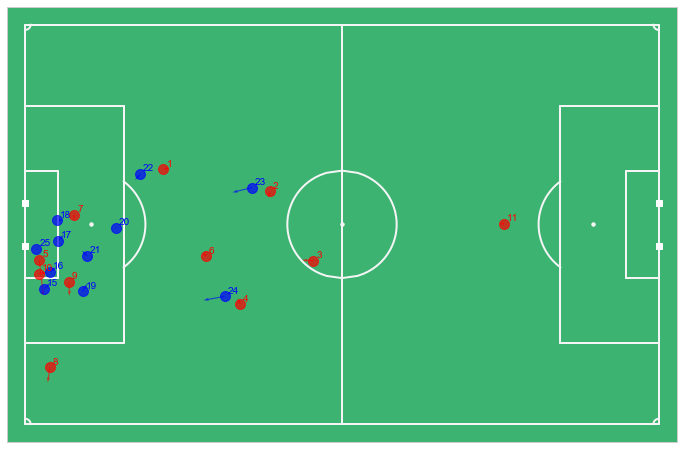

In [71]:
# Visualise positions of the players at a frame and their respective velocities using plot_events function from mviz library
# Note use of the 'include_player_velocities' parameter
fig,ax = mviz.plot_frame(df_tracking_home.loc[10_000], df_tracking_away.loc[10_000], include_player_velocities=True, annotate=True)

#### <a id='#section5.2.4'>5.2.4. Generating physical performance reports</a>
Generate a bespoke physical summary of all the players for the Home team.

In [72]:
# Physical summary for home players

## Create DataFrame to indeitify the jersey number of the Home players
df_home_players = np.unique([ c.split('_')[1] for c in df_tracking_home.columns if c[:4] == 'Home'])

## Create DataFrame where each row is a player
df_home_summary = pd.DataFrame(index=df_home_players)


# Display Empty DataFrame of players - to be populated
df_home_summary

""
1
10
11
12
13
14
2
3
4
5


##### <a id='#section5.2.4.1'>5.2.4.1. Minutes played</a>

In [73]:
# Calculate minutes played for each player

## Create emplty list for minutes
lst_minutes = []

## Cycle through each player's jersey number in the home team and look for the first and last time for each player
for player in df_home_players:
    # search for first and last frames that we have a position observation for each player (when a player is not on the pitch positions are NaN)
    column = 'Home_' + player + '_x' # use player x-position coordinate
    player_minutes = (df_tracking_home[column].last_valid_index() - df_tracking_home[column].first_valid_index() + 1 ) / 25 / 60     # convert to minutes
    lst_minutes.append(player_minutes)
df_home_summary['Minutes Played'] = lst_minutes
df_home_summary = df_home_summary.sort_values(['Minutes Played'], ascending=False)


# Display DataFrame of players and minutes played
df_home_summary

,Minutes Played
1,94.104000
11,94.104000
2,94.104000
3,94.104000
5,94.104000
6,94.104000
7,94.104000
9,94.104000
10,83.825333
8,70.740667


##### <a id='#section5.2.4.2'>5.2.4.2. Distance covered</a>

In [74]:
# Calculate total distance covered for each player

## Create emplty list for distance
lst_distance = []

## Cycle through each player's jersey number in the home team and multiple their speed at any given instance by 40ms to get total distance and divide by 1,000 to get this in km
for player in df_home_summary.index:
    column = 'Home_' + player + '_speed'
    df_player_distance = df_tracking_home[column].sum()/25./1000    # speed time time. Convert to km
    lst_distance.append(df_player_distance)
df_home_summary['Distance [km]'] = lst_distance


# Display DataFrame of players their minutes played and distance covered
df_home_summary

,Minutes Played,Distance [km]
1,94.104000,10.418124
11,94.104000,5.237010
2,94.104000,9.896841
3,94.104000,9.591745
5,94.104000,11.979224
6,94.104000,11.573299
7,94.104000,11.108719
9,94.104000,9.803775
10,83.825333,9.019024
8,70.740667,9.046879


Text(0, 0.5, 'Distance covered [km]')

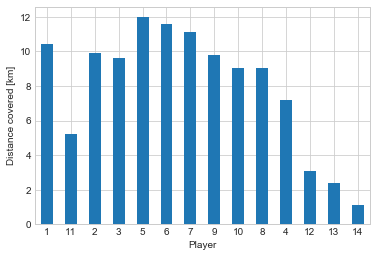

In [75]:
# Make a simple bar chart of distance covered for each player
plt.subplots()
ax = df_home_summary['Distance [km]'].plot.bar(rot=0)
ax.set_xlabel('Player')
ax.set_ylabel('Distance covered [km]')

Here we can visually see the total distances that the players ran. For example , we can see that player 11 ran about 5km and is most likely the goalkeeper. We can check this by plotting the position of the players at KO to find out exactly what position each player is playing.

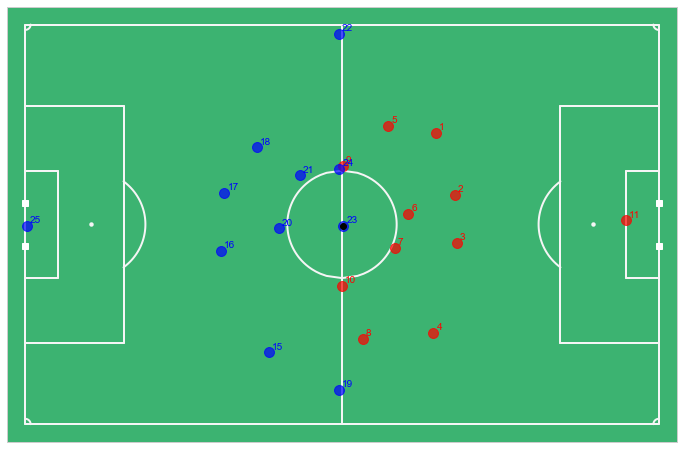

In [76]:
# Visualise positions of the players at kick off (to find out what position each player is playing)

## Define index of kick off - found from the Event data, which is in sync with the Tracking data
index_kick_off = 51

## Visualise positions of the players at kick off using plot_frame function from mviz library, which separates the x and y coordinates of all the players in a frame
fix, ax = mviz.plot_frame(df_tracking_home.loc[index_kick_off], df_tracking_away.loc[index_kick_off], include_player_velocities=False, annotate=True)

##### <a id='#section5.2.4.3'>5.2.4.3. Distance covered: walking, jogging, running, sprinting</a>

In [77]:
# Calculate total distance covered for each player for different types of movement

## Create empty list for distance
lst_distance = []

## Cycle through each player's jersey number in the home team and multiple their speed at any given instance by 40ms to get total distance and divide by 1,000 to get this in km
for player in df_home_summary.index:
    column = 'Home_' + player + '_speed'
    df_player_distance = df_tracking_home[column].sum()/25./1000    # speed time time. Convert to km
    lst_distance.append(df_player_distance)
df_home_summary['Distance [km]'] = lst_distance


# Display DataFrame of players their minutes played and distance covered
df_home_summary

,Minutes Played,Distance [km]
1,94.104000,10.418124
11,94.104000,5.237010
2,94.104000,9.896841
3,94.104000,9.591745
5,94.104000,11.979224
6,94.104000,11.573299
7,94.104000,11.108719
9,94.104000,9.803775
10,83.825333,9.019024
8,70.740667,9.046879


In [78]:
# Calculate total distance covered for each player for different types of movement

## Create empty lists for distances of different movements
lst_walking = []
lst_jogging = []
lst_running = []
lst_sprinting = []

## Cycle through each player's jersey number in the home team and 
for player in df_home_summary.index:
    column = 'Home_' + player + '_speed'
    ### Walking (less than 2m/s)
    player_distance = df_tracking_home.loc[df_tracking_home[column] <2, column].sum()/25./1000
    lst_walking.append(player_distance)
    ### Jogging (between 2 and 4 m/s)
    player_distance = df_tracking_home.loc[(df_tracking_home[column] >= 2) & (df_tracking_home[column] < 4), column].sum()/25./1000
    lst_jogging.append(player_distance)
    ### Running (between 4 and 7 m/s)
    player_distance = df_tracking_home.loc[(df_tracking_home[column] >= 4) & (df_tracking_home[column] < 7), column].sum()/25./1000
    lst_running.append(player_distance)
    ### Sprinting (greater than 7 m/s)
    player_distance = df_tracking_home.loc[df_tracking_home[column] >= 7, column].sum()/25./1000
    lst_sprinting.append(player_distance)

## Assign each movement list to a column in the Home Summary DataFrame
df_home_summary['Walking [km]'] = lst_walking
df_home_summary['Jogging [km]'] = lst_jogging
df_home_summary['Running [km]'] = lst_running
df_home_summary['Sprinting [km]'] = lst_sprinting


# Display DataFrame of players their minutes the distances covered for each movement type
df_home_summary

,Minutes Played,Distance [km],Walking [km],Jogging [km],Running [km],Sprinting [km]
1,94.104000,10.418124,3.708538,4.434862,2.177109,0.097614
11,94.104000,5.237010,4.413459,0.786952,0.031087,0.005512
2,94.104000,9.896841,4.083395,4.077484,1.632026,0.103936
3,94.104000,9.591745,4.179823,3.851974,1.394199,0.165750
5,94.104000,11.979224,3.588130,4.666655,3.532567,0.191871
6,94.104000,11.573299,3.388722,5.150761,2.846101,0.187716
7,94.104000,11.108719,3.613849,4.960861,2.342095,0.191915
9,94.104000,9.803775,4.439447,3.328606,1.869363,0.166359
10,83.825333,9.019024,3.862551,3.433265,1.423594,0.299614
8,70.740667,9.046879,2.605117,4.137275,2.201993,0.102494


Text(0, 0.5, 'Distance covered [m]')

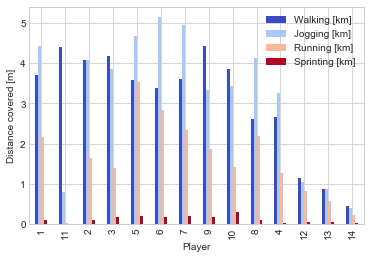

In [79]:
# Make a clustered bar chart of distance covered for each player at each speed
ax = df_home_summary[['Walking [km]', 'Jogging [km]', 'Running [km]', 'Sprinting [km]']].plot.bar(colormap='coolwarm')
ax.set_xlabel('Player')
ax.set_ylabel('Distance covered [m]')

As we expected, it's the midfielders and forwards that do more sprinting.

##### <a id='#section5.2.4.4'>5.2.4.4. Sustained sprints: how many sustained sprints per match</a>

In [80]:
# sustained sprints: how many sustained sprints per match did each player complete? Defined as maintaining a speed > 7 m/s for at least 1 second
nsprints = []
sprint_threshold = 7 # minimum speed to be defined as a sprint {m/s}
sprint_window = 1 * 25
for player in df_home_summary.index:
    column = 'Home_' + player + '_speed'
    # trick here is to convolve speed with a window of size 'sprint_window', and find number of occassions that sprint was sustained for at least one window length
    # diff helps us to identify when the window starts
    player_sprints = np.diff(1 * (np.convolve(1 * (df_tracking_home[column] >= sprint_threshold), np.ones(sprint_window), mode='same') >= sprint_window))
    nsprints.append(np.sum(player_sprints == 1 ))
df_home_summary['# sprints'] = nsprints

In [81]:
# Plot the trajectories for each of player 10's sprints
player = '10'
column = 'Home_' + player + '_speed' # speed
column_x = 'Home_' + player + '_x' # x position
column_y = 'Home_' + player + '_y' # y position
# same trick as before to find start and end indices of windows of size 'sprint_window' in which player speed was above the sprint_threshold
player_sprints = np.diff(1 * (np.convolve(1 * (df_tracking_home[column] >= sprint_threshold), np.ones(sprint_window), mode='same') >= sprint_window))
player_sprints_start = np.where(player_sprints == 1)[0] - int(sprint_window/2) + 1 # adding sprint_window/2 because of the way that the convolution is centred
player_sprints_end = np.where(player_sprints == -1)[0] + int(sprint_window/2) + 1

In [82]:
# Print frames in which player 10 started sprints
print(player_sprints_start)

[ 16301  20977  34804  37380  51703  61245  73659  81181  83622  89387
 104002 109525 124176]


In [83]:
# Print frames in which player 10 started sprints
print(player_sprints_end)

[ 16436  21018  34846  37467  51796  61294  73703  81220  83677  89427
 104030 109553 124258]


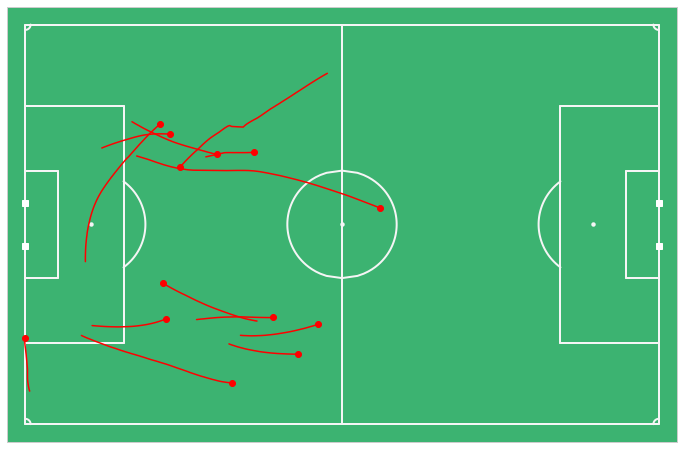

In [84]:
# now plot all the sprints
fig,ax = mviz.plot_pitch()
for s,e in zip(player_sprints_start,player_sprints_end):
    ax.plot(df_tracking_home[column_x].iloc[s], df_tracking_home[column_y].iloc[s], 'ro')
    ax.plot(df_tracking_home[column_x].iloc[s:e+1], df_tracking_home[column_y].iloc[s:e+1], 'r')

Notes from observing the tracking data of sprints for player 10:
*    The sprint to the by-line is an incident where the player is trying to keep the ball in play (ses Laurie's video in the last minute of video 2).

##### <a id='#section5.2.4.5'>5.2.4.5. Estimate the top speed of each player</a>

In [85]:
# Define function to get the top speeds for a Tracking data DataFrame
def get_max_speeds(df):
    top_speeds = {}

    v_columns = [i for i in df.columns if '_speed' in i]

    for i in v_columns:
        p = i.split('_')[1]

        #max_ind = tracking_home[i].idxmax()    
        top_speeds['Player_' + p] = df[i].max()
    return top_speeds

In [102]:
dict_home_top_speeds = get_max_speeds(df_tracking_home)
dict_away_top_speeds = get_max_speeds(df_tracking_away)

In [103]:
dict_home_top_speeds

{'Player_1': 11.425340695133231,
 'Player_10': 11.930318520350722,
 'Player_11': 10.19022385672603,
 'Player_12': 11.953692818550149,
 'Player_13': 11.37093439433352,
 'Player_14': 11.047097899458503,
 'Player_2': 11.785640044148954,
 'Player_3': 11.504515906818593,
 'Player_4': 11.97514827675483,
 'Player_5': 11.766800244767074,
 'Player_6': 11.755448492082037,
 'Player_7': 11.615628652821453,
 'Player_8': 11.951287294691726,
 'Player_9': 10.52582471828212}

In [104]:
dict_away_top_speeds

{'Player_15': 11.921589250190554,
 'Player_16': 11.85312175126255,
 'Player_17': 11.979369682928233,
 'Player_18': 11.942766859076844,
 'Player_19': 11.87413244200426,
 'Player_20': 11.846862802035618,
 'Player_21': 9.350337975130284,
 'Player_22': 11.18788216108057,
 'Player_23': 11.884310718348571,
 'Player_24': 10.96094362955215,
 'Player_25': 11.157654648277175,
 'Player_26': 9.06260762695528}

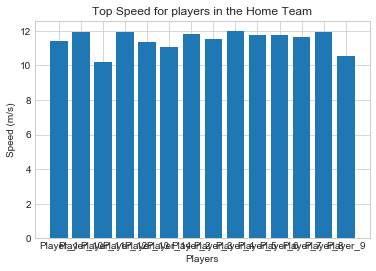

In [105]:
plt.bar(dict_home_top_speeds.keys(), dict_home_top_speeds.values())
plt.title('Top Speed for players in the Home Team')
plt.ylabel('Speed (m/s)')
plt.xlabel('Players')
plt.show()

##### <a id='#section5.2.4.6'>5.2.4.6. Measure player accelaration from the tracking data and estimate the maximum rate of acceleration for each player</a>

In [90]:
def compute_accelaration(df):

    # Get the player ids
    v_columns = [i for i in df.columns if '_speed' in i]

    # Calculate the timestep from one frame to the next. Should always be 0.04 within the same half
    dt = df['Time [s]'].diff()
    

    for c in v_columns:
        player = '_'.join(c.split('_')[:2])
        
        ax = df[player+"_vx"].diff() / dt
        ay = df[player+"_vy"].diff() / dt
        
        # put player speed in x,y direction, and total speed back in the data frame
        df[player + "_ax"] = ax
        df[player + "_ay"] = ay
        df[player + "_acc"] = np.sqrt( ax**2 + ay**2 )

    return df

In [91]:
df_tracking_home = compute_accelaration(df_tracking_home.copy())

df_tracking_home.head()

,Period,Time [s],Home_11_x,Home_11_y,Home_1_x,Home_1_y,Home_2_x,Home_2_y,Home_3_x,Home_3_y,Home_4_x,Home_4_y,Home_5_x,Home_5_y,Home_6_x,Home_6_y,Home_7_x,Home_7_y,Home_8_x,Home_8_y,Home_9_x,Home_9_y,Home_10_x,Home_10_y,Home_12_x,Home_12_y,Home_13_x,Home_13_y,Home_14_x,Home_14_y,ball_x,ball_y,Home_1_vx,Home_1_vy,Home_1_speed,Home_10_vx,Home_10_vy,Home_10_speed,Home_11_vx,Home_11_vy,Home_11_speed,Home_12_vx,Home_12_vy,Home_12_speed,Home_13_vx,Home_13_vy,Home_13_speed,Home_14_vx,Home_14_vy,Home_14_speed,Home_2_vx,Home_2_vy,Home_2_speed,Home_3_vx,Home_3_vy,Home_3_speed,Home_4_vx,Home_4_vy,Home_4_speed,Home_5_vx,Home_5_vy,Home_5_speed,Home_6_vx,Home_6_vy,Home_6_speed,Home_7_vx,Home_7_vy,Home_7_speed,Home_8_vx,Home_8_vy,Home_8_speed,Home_9_vx,Home_9_vy,Home_9_speed,Home_1_ax,Home_1_ay,Home_1_acc,Home_10_ax,Home_10_ay,Home_10_acc,Home_11_ax,Home_11_ay,Home_11_acc,Home_12_ax,Home_12_ay,Home_12_acc,Home_13_ax,Home_13_ay,Home_13_acc,Home_14_ax,Home_14_ay,Home_14_acc,Home_2_ax,Home_2_ay,Home_2_acc,Home_3_ax,Home_3_ay,Home_3_acc,Home_4_ax,Home_4_ay,Home_4_acc,Home_5_ax,Home_5_ay,Home_5_acc,Home_6_ax,Home_6_ay,Home_6_acc,Home_7_ax,Home_7_ay,Home_7_acc,Home_8_ax,Home_8_ay,Home_8_acc,Home_9_ax,Home_9_ay,Home_9_acc
Frame,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1,0.04,46.9315,-0.28084,15.70072,14.5486,18.81712,4.89396,21.07492,-3.81208,15.20888,-17.85204,-28.26066,16.40908,10.88514,1.77004,9.01848,-2.05156,3.35278,-17.05712,0.67522,13.50684,0.20564,-7.56364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,0.08,46.9315,-0.28084,15.70072,14.5486,18.81712,4.89396,21.07492,-3.81208,15.20888,-17.85204,-28.26066,16.40908,10.88514,1.77004,9.01848,-2.05156,3.35278,-17.05712,0.67522,13.50684,0.20564,-7.56364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,0.12,46.9315,-0.28084,15.70072,14.5486,18.81712,4.89396,21.07492,-3.81208,15.20888,-17.85204,-28.26066,16.40908,10.88514,1.77004,9.01848,-2.05156,3.35278,-17.05712,0.67522,13.50684,0.20564,-7.56364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,0.16,46.9315,-0.28084,15.70072,14.5486,18.81712,4.89396,21.07492,-3.81208,15.20888,-17.85204,-28.35076,16.40840,10.88514,1.77004,9.01848,-2.05156,3.35278,-17.05712,0.67522,13.50684,0.20564,-7.56364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.2525,-0.017,2.252564,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-56.3125,-0.425,56.314104,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1,0.20,46.9315,-0.28084,15.70072,14.5486,18.81712,4.89396,21.07492,-3.81208,15.20888,-17.85204,-28.43980,16.40772,10.88514,1.77004,9.01848,-2.05156,3.35278,-17.05712,0.67522,13.50684,0.20564,-7.56364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0

In [92]:
df_tracking_away = compute_accelaration(df_tracking_away.copy())

df_tracking_away.head()

,Period,Time [s],Away_25_x,Away_25_y,Away_15_x,Away_15_y,Away_16_x,Away_16_y,Away_17_x,Away_17_y,Away_18_x,Away_18_y,Away_19_x,Away_19_y,Away_20_x,Away_20_y,Away_21_x,Away_21_y,Away_22_x,Away_22_y,Away_23_x,Away_23_y,Away_24_x,Away_24_y,Away_26_x,Away_26_y,ball_x,ball_y,Away_15_vx,Away_15_vy,Away_15_speed,Away_16_vx,Away_16_vy,Away_16_speed,Away_17_vx,Away_17_vy,Away_17_speed,Away_18_vx,Away_18_vy,Away_18_speed,Away_19_vx,Away_19_vy,Away_19_speed,Away_20_vx,Away_20_vy,Away_20_speed,Away_21_vx,Away_21_vy,Away_21_speed,Away_22_vx,Away_22_vy,Away_22_speed,Away_23_vx,Away_23_vy,Away_23_speed,Away_24_vx,Away_24_vy,Away_24_speed,Away_25_vx,Away_25_vy,Away_25_speed,Away_26_vx,Away_26_vy,Away_26_speed,Away_15_ax,Away_15_ay,Away_15_acc,Away_16_ax,Away_16_ay,Away_16_acc,Away_17_ax,Away_17_ay,Away_17_acc,Away_18_ax,Away_18_ay,Away_18_acc,Away_19_ax,Away_19_ay,Away_19_acc,Away_20_ax,Away_20_ay,Away_20_acc,Away_21_ax,Away_21_ay,Away_21_acc,Away_22_ax,Away_22_ay,Away_22_acc,Away_23_ax,Away_23_ay,Away_23_acc,Away_24_ax,Away_24_ay,Away_24_acc,Away_25_ax,Away_25_ay,Away_25_acc,Away_26_ax,Away_26_ay,Away_26_acc
Frame,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1,0.04,-51.70892,-1.19884,-18.13554,-21.65528,-20.42196,-3.52376,-18.8309,7.51128,-14.3047,12.88668,-0.46216,-28.12752,-10.79928,1.89176,-7.08822,12.67928,-0.11766,35.53884,0.18762,-0.0986,-0.51198,9.36088,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,0.08,-51.70892,-1.19884,-18.13554,-21.65528,-20.42196,-3.52376,-18.8309,7.51128,-14.3047,12.88668,-0.46216,-28.12752,-10.79928,1.89176,-7.08822,12.67928,-0.11766,35.53884,0.18762,-0.0986,-0.51198,9.36088,NaN,NaN,NaN,NaN,0.0000,0.000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,0.12,-51.70892,-1.19884,-18.13554,-21.65528,-20.42196,-3.52376,-18.8309,7.51128,-14.3047,12.88668,-0.46216,-28.12752,-10.79928,1.89176,-7.08822,12.67928,-0.11766,35.53884,0.18762,-0.0986,-0.51198,9.36088,NaN,NaN,NaN,NaN,0.0000,0.000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0000,0.000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
4,1,0.16,-51.70892,-1.19884,-18.19384,-21.65596,-20.42196,-3.52376,-18.8309,7.51128,-14.3047,12.88668,-0.46216,-28.12752,-10.79928,1.89176,-7.08822,12.67928,-0.11766,35.53884,0.18762,-0.0986,-0.51198,9.36088,NaN,NaN,NaN,NaN,-1.4575,-0.017,1.457599,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,-36.4375,-0.425,36.439978,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
5,1,0.20,-51.70892,-1.19884,-18.25002,-21.65596,-20.42196,-3.52376,-18.8309,7.51128,-14.3047,12.88668,-0.46216,-28.12752,-10.79928,1.89176,-7.08822,12.67928,-0.11766,35.53884,0.18762,-0.0986,-0.51198,9.36088,NaN,NaN,NaN,NaN,-1.4045,0.000,1.404500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,1.3250,0.425,1.391492,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN


In [93]:
def get_max_acc(df):
    top_acc = {}

    v_columns = [i for i in df.columns if '_acc' in i]

    for i in v_columns:
        p = i.split('_')[1]

        #max_ind = tracking_home[i].idxmax()    
        top_acc['Player_' + p] = df[i].max()
    return top_acc

In [94]:
dict_home_top_acc = get_max_acc(df_tracking_home)

In [95]:
dict_away_top_acc = get_max_acc(df_tracking_away)

In [96]:
dict_home_top_acc

{'Player_1': 425.14920193511307,
 'Player_10': 425.0889436345607,
 'Player_11': 331.1165240521811,
 'Player_12': 564.6029640662633,
 'Player_13': 414.6628103057063,
 'Player_14': 310.7909699968819,
 'Player_2': 423.10847973734747,
 'Player_3': 406.33456658350264,
 'Player_4': 397.1718724312843,
 'Player_5': 376.6605799662588,
 'Player_6': 353.07446651762814,
 'Player_7': 254.3544930313505,
 'Player_8': 366.62351708608134,
 'Player_9': 299.4775544599685}

In [97]:
dict_away_top_acc 

{'Player_15': 269.63750000049157,
 'Player_16': 436.9639639397728,
 'Player_17': 442.4745995542725,
 'Player_18': 385.3124997979442,
 'Player_19': 388.053856604396,
 'Player_20': 411.9054093474048,
 'Player_21': 287.5682323899542,
 'Player_22': 279.6970540272686,
 'Player_23': 394.7122155768125,
 'Player_24': 280.3878708597894,
 'Player_25': 394.984562990211,
 'Player_26': 234.3652654622279}

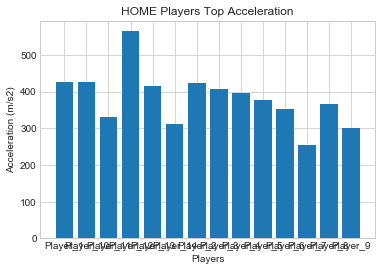

In [99]:
plt.bar(dict_home_top_acc.keys(), dict_home_top_acc.values())
plt.title('HOME Players Top Acceleration')
plt.ylabel('Acceleration (m/s2)')
plt.xlabel('Players')
plt.show()

### <a id='#section5.3'>5.3. Pitch Control modelling</a>

#### <a id='#section5.3.1'>5.3.1. Theory</a>
Using the Tracking data, we can use this to build your Pitch Control models in Python and demonstrate how it can be used to evaluate a player's passing options using tracking and event data. But what is a Pitch Control model?

Definition:
**Pitch control at a given location is the probability that a player (or team) will gain control of the ball if it moves directly to that location.**

Pitch control measures the probability that a team will retain possession of the ball if they pass it to another location on the field. It can be used to evaluate passing options for a player, and quantify the probability of success.

The method described here is based on work by [William Spearman](https://twitter.com/the_spearman), as described in his Friend of Tracking video tutorial: [[link](https://www.youtube.com/watch?v=X9PrwPyolyU)] and see below.

Also see Spearman's paper "Beyond Expected Goals" published at the 2018 MIT Sloan Sports Analytics Conference [[link](http://www.sloansportsconference.com/wp-content/uploads/2018/02/2002.pdf)].

In the video below, Spearman explains the following for Pitch Control:
*    The principles behind pitch control models.
*    How they can be used to investigate player positioning.
*    How to extend them to account for ball motion.
*    How to combine pitch control models with measures of danger.
*    Defining 'off-ball scoring opportunity'
*    Extensions to pitch control.

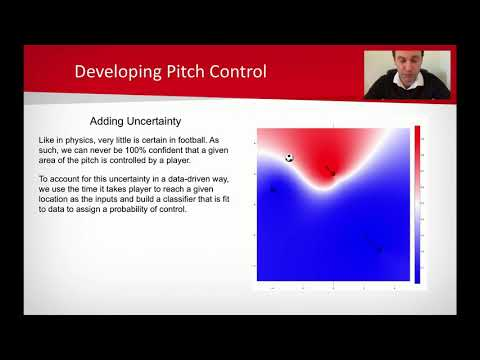

In [106]:
# Liverpool FC data scientist William Spearman's masterclass in pitch control
YouTubeVideo('X9PrwPyolyU', width=800, height=470)

#### <a id='#section5.3.2'>5.3.2. Creating Pitch Control models from Tracking data</a>

##### <a id='#section5.3.2.1'>5.3.2.1. Plot Pitch Control of identified passes</a>
Pitch Control visualisation are a great way to summarise not only the probabilities of success for any given passing option but it is also a nice way of visualising what options were available to a player on the ball at any given instant.

Visualisations use the `plot_pitchcontrol_for_event` functiion from the `mviz` library.

(<Figure size 864x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a2d3eb8d0>)

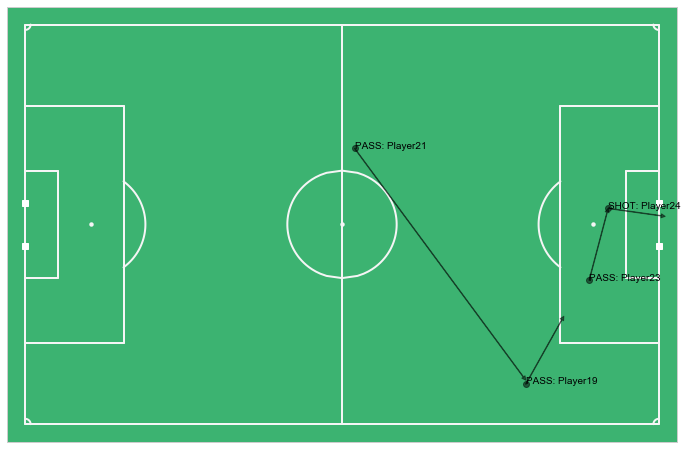

In [110]:
# Visualise three moves leading up to the second goal

## Define index of second goal
index_second_goal_start = 820
index_second_goal_end = 823

## Visualise pass move in run up to the second goal for the away team (blue) - frames 820 to 823
mviz.plot_events(df_events.loc[index_second_goal_start:index_second_goal_end], color='k', indicators = ['Marker','Arrow'], annotate=True)

In [111]:
# First get model parameters
params = mpc.default_model_params(3)

In [112]:
# Print model parameters
params

{'max_player_accel': 7.0,
 'max_player_speed': 5.0,
 'reaction_time': 0.7,
 'tti_sigma': 0.45,
 'kappa_def': 1.0,
 'lambda_att': 4.3,
 'lambda_def': 4.3,
 'lambda_gk': 12.899999999999999,
 'average_ball_speed': 15.0,
 'int_dt': 0.04,
 'max_int_time': 10,
 'model_converge_tol': 0.01,
 'time_to_control_att': 3.3202550055547313,
 'time_to_control_def': 3.3202550055547313}

In [78]:
df_events

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y
0,Away,SET PIECE,KICK OFF,1,51,2.04,51,2.04,Player23,NaN,NaN,NaN,NaN,NaN
1,Away,PASS,NaN,1,51,2.04,87,3.48,Player23,Player20,0.00,-0.00,-10.60,-0.68
2,Away,PASS,NaN,1,146,5.84,186,7.44,Player20,Player18,-7.42,-0.00,-6.36,19.04
3,Away,PASS,NaN,1,248,9.92,283,11.32,Player18,Player17,-3.18,21.08,-20.14,14.96
4,Away,PASS,NaN,1,316,12.64,346,13.84,Player17,Player16,-22.26,12.24,-25.44,-5.44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1930,Away,BALL LOST,INTERCEPTION,2,140122,5604.88,140183,5607.32,Player21,NaN,-4.24,18.36,22.26,-17.68
1931,Home,CHALLENGE,AERIAL-LOST,2,140180,5607.20,140180,5607.20,Player1,NaN,20.14,-13.60,NaN,NaN
1932,Away,CHALLENGE,AERIAL-LOST,2,140183,5607.32,140183,5607.32,Player24,NaN,19.08,-13.60,NaN,NaN
1933,Home,RECOVERY,NaN,2,140211,5608.44,140211,5608.44,Player12,NaN,16.96,-12.24,NaN,NaN


In [77]:
df_tracking_home

,Period,Time [s],Home_11_x,Home_11_y,Home_1_x,Home_1_y,Home_2_x,Home_2_y,Home_3_x,Home_3_y,Home_4_x,Home_4_y,Home_5_x,Home_5_y,Home_6_x,Home_6_y,Home_7_x,Home_7_y,Home_8_x,Home_8_y,Home_9_x,Home_9_y,Home_10_x,Home_10_y,Home_12_x,Home_12_y,Home_13_x,Home_13_y,Home_14_x,Home_14_y,ball_x,ball_y,Home_1_vx,Home_1_vy,Home_1_speed,Home_10_vx,Home_10_vy,Home_10_speed,Home_11_vx,Home_11_vy,Home_11_speed,Home_12_vx,Home_12_vy,Home_12_speed,Home_13_vx,Home_13_vy,Home_13_speed,Home_14_vx,Home_14_vy,Home_14_speed,Home_2_vx,Home_2_vy,Home_2_speed,Home_3_vx,Home_3_vy,Home_3_speed,Home_4_vx,Home_4_vy,Home_4_speed,Home_5_vx,Home_5_vy,Home_5_speed,Home_6_vx,Home_6_vy,Home_6_speed,Home_7_vx,Home_7_vy,Home_7_speed,Home_8_vx,Home_8_vy,Home_8_speed,Home_9_vx,Home_9_vy,Home_9_speed
Frame,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1,0.04,46.9315,-0.28084,15.70072,14.54860,18.81712,4.89396,21.07492,-3.81208,15.20888,-17.85204,-28.26066,16.40908,10.88514,1.77004,9.01848,-2.05156,3.35278,-17.05712,0.67522,13.50684,0.20564,-7.56364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,0.08,46.9315,-0.28084,15.70072,14.54860,18.81712,4.89396,21.07492,-3.81208,15.20888,-17.85204,-28.26066,16.40908,10.88514,1.77004,9.01848,-2.05156,3.35278,-17.05712,0.67522,13.50684,0.20564,-7.56364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.000,0.000000,0.0000,0.000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.000,0.000000
3,1,0.12,46.9315,-0.28084,15.70072,14.54860,18.81712,4.89396,21.07492,-3.81208,15.20888,-17.85204,-28.26066,16.40908,10.88514,1.77004,9.01848,-2.05156,3.35278,-17.05712,0.67522,13.50684,0.20564,-7.56364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.000,0.000000,0.0000,0.000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.000,0.000000
4,1,0.16,46.9315,-0.28084,15.70072,14.54860,18.81712,4.89396,21.07492,-3.81208,15.20888,-17.85204,-28.35076,16.40840,10.88514,1.77004,9.01848,-2.05156,3.35278,-17.05712,0.67522,13.50684,0.20564,-7.56364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.2525,-0.017,2.252564,0.0000,0.000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.000,0.000000
5,1,0.20,46.9315,-0.28084,15.70072,14.54860,18.81712,4.89396,21.07492,-3.81208,15.20888,-17.85204,-28.43980,16.40772,10.88514,1.77004,9.01848,-2.05156,3.35278,-17.05712,0.67522,13.50684,0.20564,-7.56364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.2260,-0.017,2.226065,0.0000,0.000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141152,2,5646.08,46.3379,0.84524,12.19106,-23.55792,29.08852,-5.87860,24.22948,-12.09788,NaN,NaN,9.97248,-28.55864,11.75010,4.36084,14.61104,4.22824,NaN,NaN,22.86844,-9.62540,NaN,NaN,9.71278,-24.17468,-1.09392,30.29672,23.36028,-9.04400,NaN,NaN,-0.0,-0.0,0.0,NaN,NaN,NaN,-0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0530,1.513,1.513928,-1.0865,0.391,1.154713,-0.0,-0.0,0.0,-0.0,-0.0,0.0,NaN,NaN,NaN,-0.0000,-0.000,0.000000,-1.1925,-0.748,1.407679,-0.0,-0.0,0.0,NaN,NaN,NaN,1.6430,0.578,1.741704
141153,2,5646.12,46.3379,0.84524,12.19106,-23.55792,29.08852,-5.87860,24.22948,-12.09788,NaN,NaN,9.97248,-28.55864,11.69710,4.34860,14.61104,4.22824,NaN,NaN,22.93310,-9.56556,NaN,NaN,9.71278,-24.17468,-1.09286,30.34568,23.31046,-9.

In [136]:
# Find goalkeeper numbers using 'find_goalkeeper' function from mio library - required for 'generate_pitch_control_for_event' function from mpc library
GK_numbers = [mio.find_goalkeeper(df_tracking_home), mio.find_goalkeeper(df_tracking_away)]

##### First pass

(<Figure size 864x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a2d74b990>)

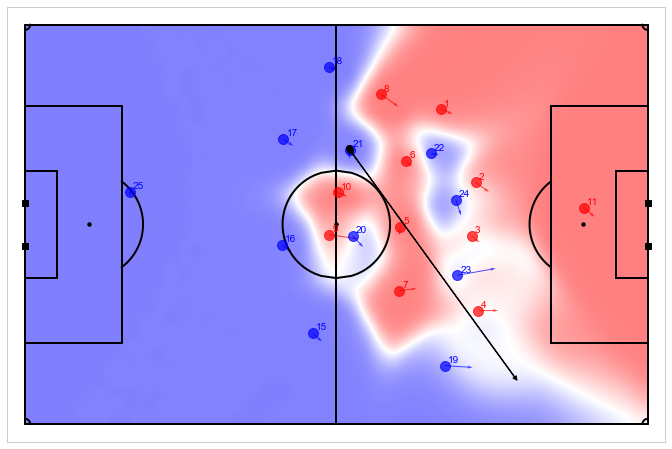

In [139]:
# Evaluated pitch control surface for first pass using 'generate_pitch_control_for_event' function from mpc library
PPCF, xgrid, ygrid = mpc.generate_pitch_control_for_event(820, df_events, df_tracking_home, df_tracking_away, params, GK_numbers, field_dimen=(106., 68.,), n_grid_cells_x=50)
mviz.plot_pitchcontrol_for_event(820, df_events, df_tracking_home, df_tracking_away, PPCF, annotate=True)   # commented out previously used parameters 'xgrid' and 'ygrid'

##### Second pass

(<Figure size 864x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a2e82be10>)

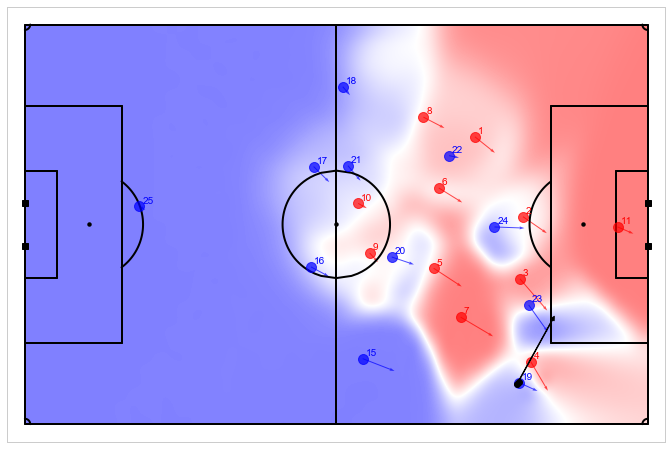

In [140]:
# Evaluated pitch control surface for the dfsecond pass using 'generate_pitch_control_for_event' function from mpc library
PPCF, xgrid, ygrid = mpc.generate_pitch_control_for_event(821, df_events, df_tracking_home, df_tracking_away, params, GK_numbers, field_dimen=(106., 68.,), n_grid_cells_x=50)
mviz.plot_pitchcontrol_for_event(821, df_events, df_tracking_home, df_tracking_away, PPCF, annotate=True)   # commented out previously used parameters 'xgrid' and 'ygrid'

##### Third pass

(<Figure size 864x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a2eafb090>)

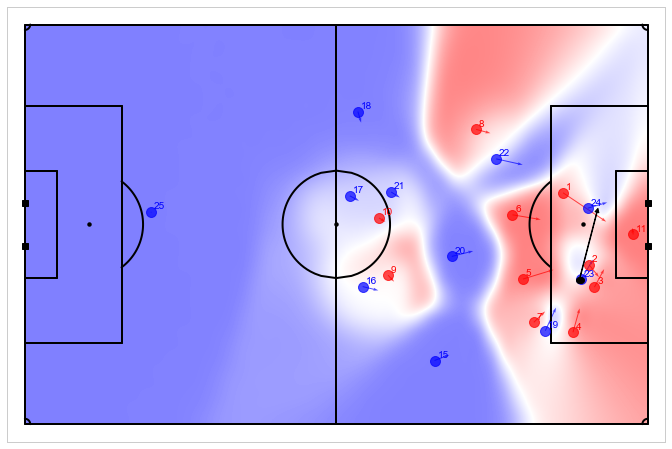

In [142]:
# Evaluated pitch control surface for the third pass using 'generate_pitch_control_for_event' function from mpc library
PPCF, xgrid, ygrid = mpc.generate_pitch_control_for_event(822, df_events, df_tracking_home, df_tracking_away, params, GK_numbers, field_dimen=(106., 68.,), n_grid_cells_x=50)
mviz.plot_pitchcontrol_for_event(822, df_events, df_tracking_home, df_tracking_away, PPCF, annotate=True)   # commented out previously used parameters 'xgrid' and 'ygrid'

##### <a id='#section5.3.2.2'>5.3.2.2. Calculate the pass probility for every home team's successful pass</a>

In [174]:
# Calculate the length of the Home Passes DataFrame i.e. the number of passes the Home team made during the game
len(df_home_passes)

543

There are 543 successful home passes in total.

In [173]:
# Calculate pass probability for every home team successful pass

## List for storing pass probabilities
lst_pass_success_probability = []

## Loop through all these successful passes, identifing the start and end position from the event data, and then calculate the probability of success for each pass using the Pitch Control model 
for i, row in df_home_passes.iterrows():
    pass_start_pos = np.array([row['Start X'], row['Start Y']])
    pass_target_pos = np.array([row['End X'], row['End Y']])
    pass_frame = row['Start Frame']
    
    attacking_players = mpc.initialise_players(df_tracking_home.loc[pass_frame], 'Home', params, GK_numbers)
    defending_players = mpc.initialise_players(df_tracking_away.loc[pass_frame], 'Away', params, GK_numbers)
    Patt, Pdef = mpc.calculate_pitch_control_at_target(pass_target_pos, attacking_players, defending_players, pass_start_pos, params)    # this line is different in the video
    
    lst_pass_success_probability.append((i, Patt))

Text(0, 0.5, 'Frequency')

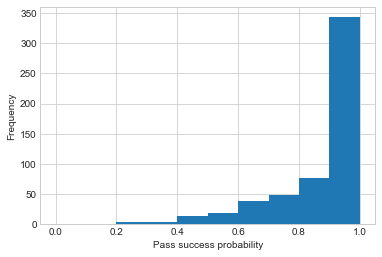

In [151]:
# Histogram of success probability of all the passes
fig, ax = plt.subplots()
ax.hist( [p[1] for p in lst_pass_success_probability], np.arange(0,1.1,0.1))    
ax.set_xlabel('Pass success probability')
ax.set_ylabel('Frequency')  

We can see that the vast majority of the passes attempted by the home team were more than 90% likely to be successful. Presumably, a lot of these passes were made between defenders when there was little/no pressure on the ball.

We can also see that there were about 20-30 passes that had less than a 50% success probability.

Let's take a look a closer look at these riskier passes in more detail.

##### <a id='#section5.3.2.3'>5.3.2.3. Further analysis of risky passes</a>

In [152]:
# Sort the passes by Pitch Control probability
lst_pass_success_probability = sorted(lst_pass_success_probability, key = lambda x: x[1])

In [157]:
# Identify from the Events DataFrame the most risky passes (pitch control < 0.5)
df_risky_passes = df_events.loc[[p[0] for p in lst_pass_success_probability if p[1] < 0.5]]

# Display DataFrame
df_risky_passes

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y
1116,Home,PASS,CROSS,2,73955,2958.20,73983,2959.32,Player8,Player9,-46.64,-19.72,-47.70,1.36
1478,Home,PASS,CROSS,2,98866,3954.64,98880,3955.20,Player9,Player10,-45.58,-22.44,-48.76,-4.08
332,Home,PASS,DEEP BALL,1,20940,837.60,21022,840.88,Player4,Player10,-1.06,-13.60,-42.40,-17.00
29,Home,PASS,NaN,1,1489,59.56,1578,63.12,Player11,Player9,53.00,10.20,9.54,24.48
813,Home,PASS,NaN,1,52620,2104.80,52692,2107.68,Player4,Player10,31.80,-18.36,0.00,6.80
197,Home,PASS,CROSS,1,12180,487.20,12202,488.08,Player1,Player10,-40.28,19.72,-47.70,-3.40
1753,Home,PASS,NaN,2,124311,4972.44,124336,4973.44,Player10,Player9,-54.06,-14.28,-45.58,0.00
1405,Home,PASS,NaN,2,93804,3752.16,93811,3752.44,Player2,Player5,-1.06,33.32,-5.30,30.60
93,Home,PASS,NaN,1,5372,214.88,5400,216.00,Player4,Player10,-1.06,-20.40,-23.32,-9.52
903,Home,PASS,NaN,1,59884,2395.36,59944,2397.76,Player9,Player1,-26.50,23.12,-49.82,16.32


(<Figure size 864x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a2f3a9790>)

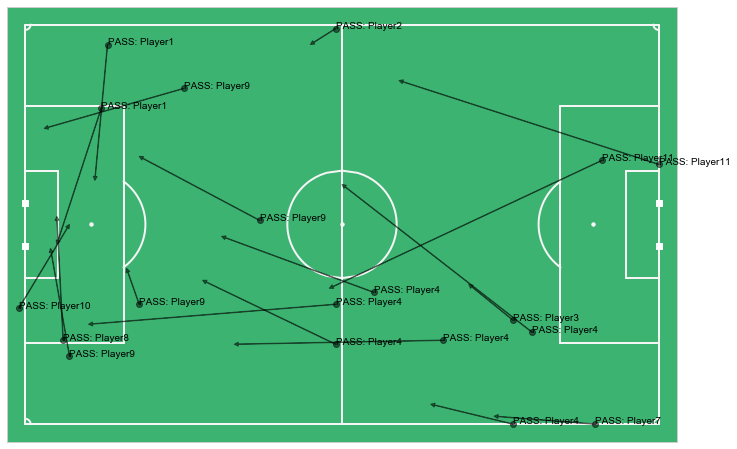

In [155]:
# Plot the events of the risky passes 
mviz.plot_events(df_risky_passes, color = 'k', indicators = ['Marker', 'Arrow'], annotate = True)

We can see from the visualisation of all the risky passes that the home team attempted i.e. classified as a 50% chances of success or less. In this visualisation, the passes are from right to left.

The first thing to notice is the passes that originate from the home team's own half tend to be lquite long passes, at least 30-40m in length. These may be clearances or goal kicks with a lwoer chance of success.

Then looking at passes in the attacking third of the field, often into the penalty area, presumably these are passes into crowded locations where the likelyhood of success is going to be much lower.

Finally we can look at what follows these risky passes by looking at the first event that follows these passes.

##### <a id='#section5.3.2.4'>5.3.2.4. Further analysis of events following risky passes</a>

In [158]:
# Print events that followed those risky passes
print('Event following a risky (completed) pass')
for p in lst_pass_success_probability[:20]:
    df_outcome = df_events.loc[p[0] + 1].Type
    print(p[1], df_outcome)

Event following a risky (completed) pass
0.26940888334951524 CHALLENGE
0.26977947525823215 SHOT
0.28355266004589275 BALL LOST
0.3118934257505092 CHALLENGE
0.33794938339419445 CHALLENGE
0.3882116886003005 SHOT
0.4120563552080869 CHALLENGE
0.4147820093582791 PASS
0.41861866721726027 PASS
0.4223978488361042 BALL LOST
0.431819076300889 CHALLENGE
0.44891911188416955 CHALLENGE
0.4610008848168425 CHALLENGE
0.46834301223806296 CHALLENGE
0.4687260445893318 SHOT
0.48894619695173597 CHALLENGE
0.4901175118019355 CHALLENGE
0.49387354493834146 SHOT
0.4985384467298248 PASS
0.5040960761022257 PASS


We can see that in well over half of these events, the event following a risky pass was either a challenge (a tackle) or the ball was simply lost by the home team. Even though the passes were completed, the home team didn't neccessarily retain possession for very long. We can also see there is a lot of shots as well, as we previously saw, a lot of these passes were passes into the penalty area.

##### <a id='#section5.3.2.5'>5.3.2.5. How might you use the pitch control model to calculate how much space was created (or territory captured) by an off the ball run?</a>
Hint: consider what the Pitch Control surface might have looked like if the player had *not* made a run.

In [ ]:
# CODE HERE

### <a id='#section5.4'>5.4. Valuing player actions through an Expected Possession Value (EPV) model</a>

#### <a id='#section5.4.1'>5.4.1. Theory 

#### <a id='#section5.4.2'>5.4.2. Creating Pitch Control models from Tracking data</a>

##### <a id='#section5.4.2.1'>5.4.2.1. Get the EPV surface
The `plot_EPV` function from the `mviz` library uses the `find_playing_direction` function, initialised in the Data Engineering section

In [181]:
home_attack_direction

-1.0

In [166]:
EPV = mepv.load_EPV_grid('EPV_grid.csv')

In [167]:
EPV

array([[0.0046, 0.0046, 0.0045, ..., 0.0388, 0.0424, 0.0443],
       [0.0044, 0.0044, 0.0045, ..., 0.0388, 0.0421, 0.0437],
       [0.0041, 0.0042, 0.0044, ..., 0.0388, 0.0413, 0.0425],
       ...,
       [0.0041, 0.0042, 0.0044, ..., 0.0388, 0.0413, 0.0425],
       [0.0044, 0.0044, 0.0045, ..., 0.0388, 0.0421, 0.0437],
       [0.0046, 0.0046, 0.0045, ..., 0.0388, 0.0424, 0.0443]])

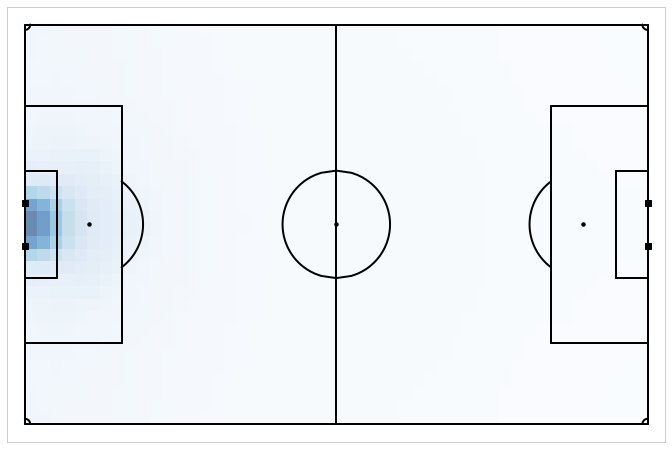

In [169]:
mviz.plot_EPV(EPV, field_dimen=[106.0, 68], attack_direction=home_attack_direction)

##### <a id='#section5.4.2.3'>5.4.2.3. ...

(<Figure size 864x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a2cfe6f50>)

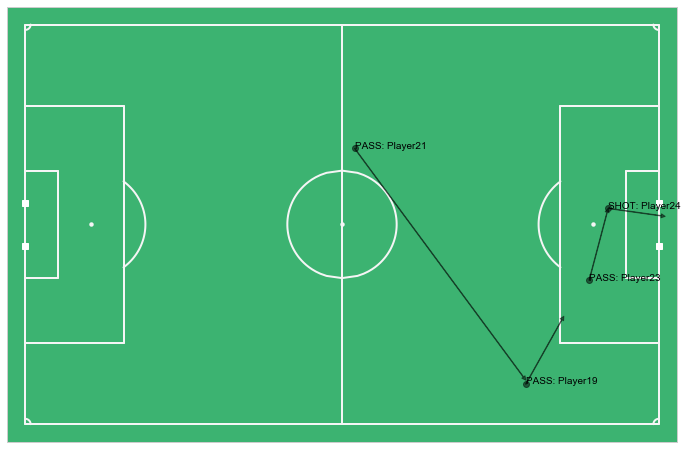

In [171]:
# plot event leading up to first away team goal
mviz.plot_events(df_events.loc[820:823], color='k', indicators = ['Marker','Arrow'], annotate=True )

(<Figure size 864x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a27d24e10>)

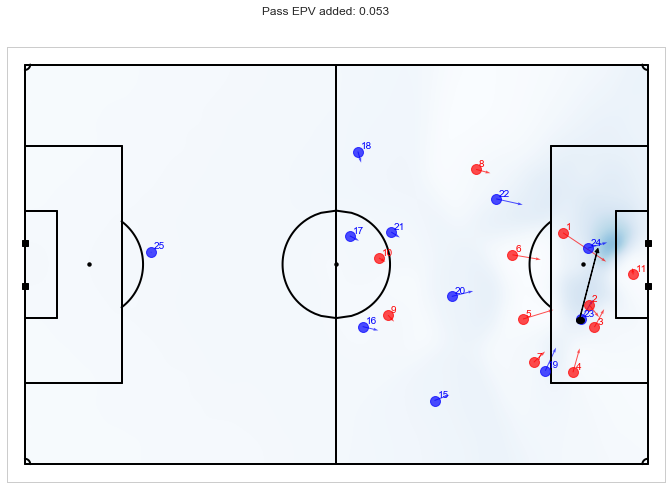

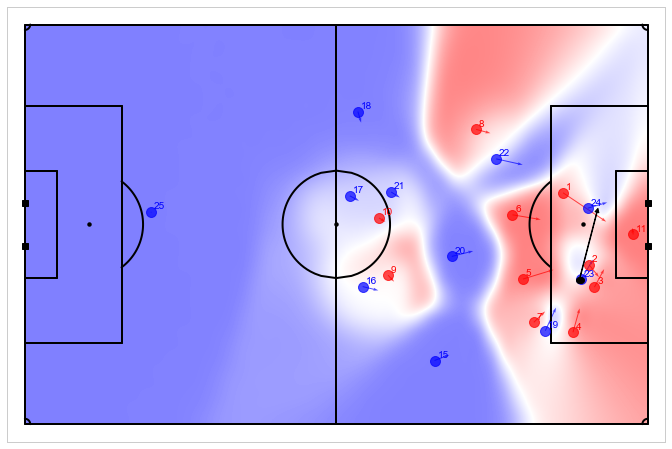

In [172]:
# Calculate value-added for assist and plot expected value surface

## Define Event Number
event_number = 822 # away team first goal


## Calculate EEPV added and the EPV difference from the Pitch Control using the 'calculate_epv_added' function
EEPV_added, EPV_diff = mepv.calculate_epv_added(event_number, df_events, df_tracking_home, df_tracking_away, GK_numbers, EPV, params)


## Calculate the full Pitch Control surface at the moment the pass is made and multiple this by the EPV surface at that instance
PPCF, xgrid, ygrid = mpc.generate_pitch_control_for_event(event_number, df_events, df_tracking_home, df_tracking_away, params, GK_numbers, field_dimen = (106.,68.,), n_grid_cells_x = 50, offsides=True)


## Create figures for Event

### Visualise EPV added
fig,ax = mviz.plot_EPV_for_event(event_number, df_events, df_tracking_home, df_tracking_away, PPCF, EPV, annotate=True, autoscale=True)
fig.suptitle('Pass EPV added: %1.3f' % EEPV_added, y=0.95 )

### Visualise Pitch Control
mviz.plot_pitchcontrol_for_event(event_number, df_events, df_tracking_home, df_tracking_away, PPCF, annotate=True)

For the EPV added visual, we can see that player 23 made the best possible pass.

##### <a id='#section5.4.2.4'>5.4.2.4. Calculate value-added for all passes
Follow calculations use the subsetted Home Passes DataFrame created in the Data Engineering section.

In [186]:
# home team value added

##
lst_home_pass_value_added = []

## 
for i, pass_ in df_home_passes.iterrows():
    EEPV_added, EPV_diff = mepv.calculate_epv_added(i, df_events, df_tracking_home, df_tracking_away, GK_numbers, EPV, params)
    lst_home_pass_value_added.append((i, EEPV_added, EPV_diff ))

In [187]:
# away team value added

##
lst_away_pass_value_added = []

##
for i, pass_ in df_away_passes.iterrows():
    EEPV_added, EPV_diff = mepv.calculate_epv_added( i, df_events, df_tracking_home, df_tracking_away, GK_numbers, EPV, params)
    lst_away_pass_value_added.append((i, EEPV_added, EPV_diff))

In [189]:
# Sort lists in decending order of EPV added
lst_home_pass_value_added = sorted(lst_home_pass_value_added, key = lambda x: x[1], reverse=True)  
lst_away_pass_value_added = sorted(lst_away_pass_value_added, key = lambda x: x[1], reverse=True)  

In [ ]:
print('Top 5 home team passes by expected EPV-added')
print(lst_home_pass_value_added[:5])

In [ ]:
df_home_shots

In [ ]:
print('Top 5 away team passes by expected EPV-added')
print(lst_away_pass_value_added[:5])

In [ ]:
df_away_shots

##### Visualise EEPV for Event 1,753

(<Figure size 864x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a30413d90>)

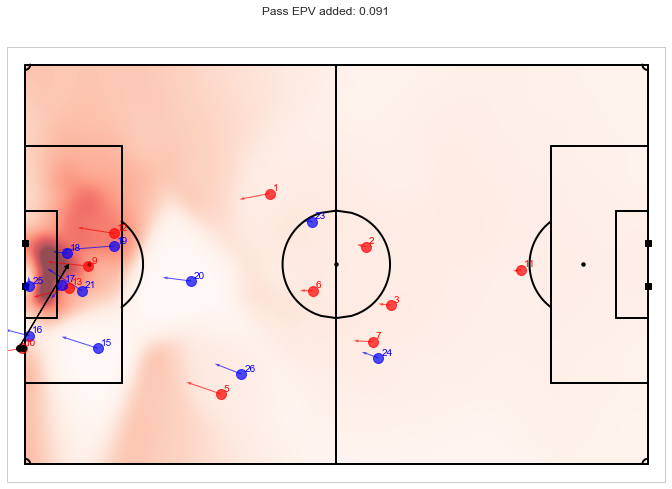

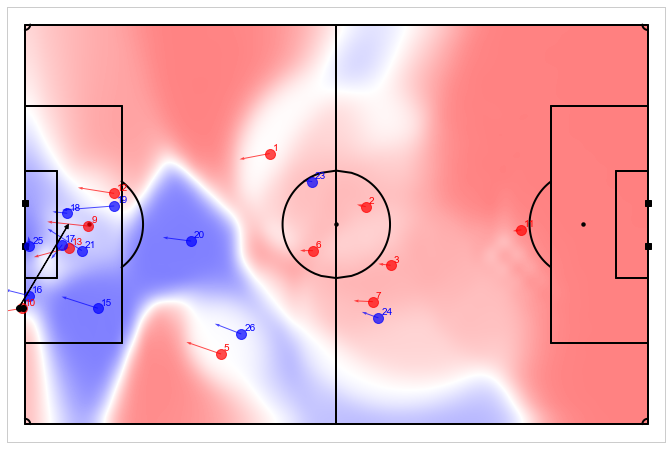

In [192]:
event_number = 1_753    # home team assist to header off target
EEPV_added, EPV_diff = mepv.calculate_epv_added(event_number, df_events, df_tracking_home, df_tracking_away, GK_numbers, EPV, params)
PPCF, xgrid, ygrid = mpc.generate_pitch_control_for_event(event_number, df_events, df_tracking_home, df_tracking_away, params, GK_numbers, field_dimen = (106.,68.,), n_grid_cells_x = 50, offsides=True)
fig, ax = mviz.plot_EPV_for_event(event_number, df_events, df_tracking_home, df_tracking_away, PPCF, EPV, annotate=True)
fig.suptitle('Pass EPV added: %1.3f' % EEPV_added, y=0.95)
mviz.plot_pitchcontrol_for_event(event_number, df_events, df_tracking_home, df_tracking_away, PPCF, annotate=True)

##### Visualise EEPV for Event 1,663

(<Figure size 864x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a30806950>)

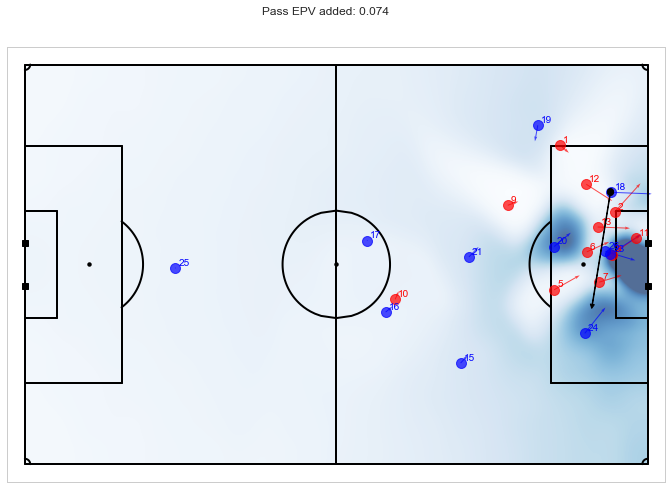

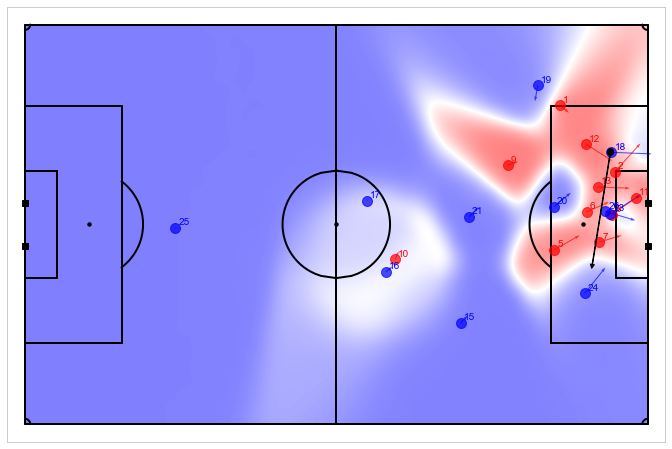

In [193]:
event_number = 1_663    # away team assisst to blocked shot
EEPV_added, EPV_diff = mepv.calculate_epv_added(event_number, df_events, df_tracking_home, df_tracking_away, GK_numbers, EPV, params)
PPCF, xgrid, ygrid = mpc.generate_pitch_control_for_event(event_number, df_events, df_tracking_home, df_tracking_away, params, GK_numbers, field_dimen = (106.,68.,), n_grid_cells_x = 50, offsides=True)
fig, ax = mviz.plot_EPV_for_event(event_number, df_events, df_tracking_home, df_tracking_away, PPCF, EPV, annotate=True)
fig.suptitle('Pass EPV added: %1.3f' % EEPV_added, y=0.95)
mviz.plot_pitchcontrol_for_event(event_number, df_events, df_tracking_home, df_tracking_away, PPCF, annotate=True)

##### Visualise EPV for Event 195

(<Figure size 864x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a30f735d0>)

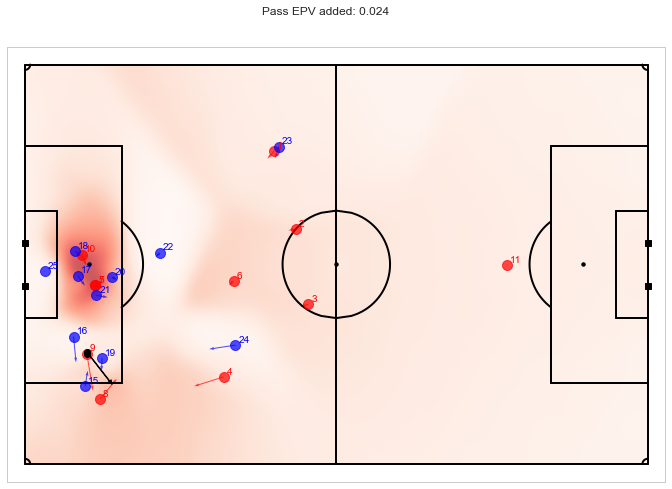

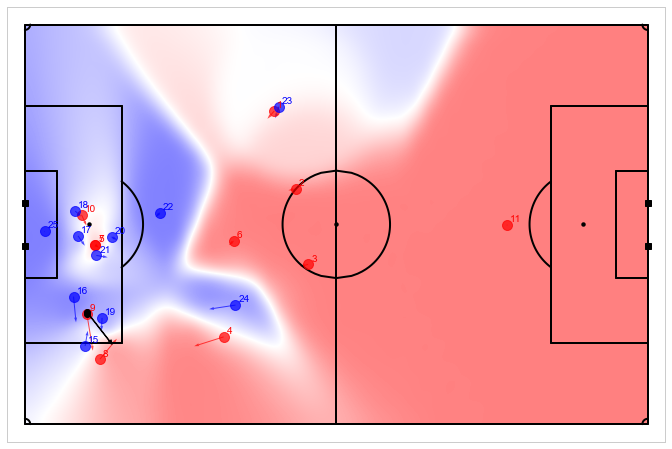

In [194]:
event_number = 195    # retaining possession
EEPV_added, EPV_diff = mepv.calculate_epv_added(event_number, df_events, df_tracking_home, df_tracking_away, GK_numbers, EPV, params)
PPCF, xgrid, ygrid = mpc.generate_pitch_control_for_event(event_number, df_events, df_tracking_home, df_tracking_away, params, GK_numbers, field_dimen = (106.,68.,), n_grid_cells_x = 50, offsides=True)
fig, ax = mviz.plot_EPV_for_event(event_number, df_events, df_tracking_home, df_tracking_away, PPCF, EPV, annotate=True)
fig.suptitle('Pass EPV added: %1.3f' % EEPV_added, y=0.95)
mviz.plot_pitchcontrol_for_event(event_number, df_events, df_tracking_home, df_tracking_away, PPCF, annotate=True)

##### <a id='#section5.4.2.5'>5.4.2.5. Find maximum possible EPV-added for all home team passes (takes a while to run!)

In [195]:
#

##
maximum_EPV_added = []

##
for i,row in df_home_passes.iterrows():
    print( 'Event %d' % (i))
    EEPV_added, EPV_diff = mepv.calculate_epv_added(i, df_events, df_tracking_home, df_tracking_away, GK_numbers, EPV, params)
    max_EEPV_added, target = mepv.find_max_value_added_target(i, df_events, df_tracking_home, df_tracking_away, GK_numbers, EPV, params)
    maximum_EPV_added.append((i, max_EEPV_added, EEPV_added, EPV_diff))

# sort by the difference between maximum value-added and value-added for the actual pass that was made
# note: some values may be slightly negative because of how the maximum value-added search is performed over a grid
maximum_EPV_added = sorted(maximum_EPV_added, key=lambda x: x[1]-x[2], reverse=True)

Event 28
Event 29
Event 36
Event 52
Event 53
Event 54
Event 55
Event 56
Event 57
Event 58
Event 59
Event 65
Event 66
Event 67
Event 68
Event 69
Event 70
Event 71
Event 72
Event 73
Event 74
Event 75
Event 76
Event 77
Event 78
Event 79
Event 80
Event 81
Event 82
Event 92
Event 93
Event 94
Event 95
Event 96
Event 97
Event 98
Event 99
Event 100
Event 101
Event 112
Event 113
Event 114
Event 121
Event 122
Event 123
Event 124
Event 130
Event 141
Event 142
Event 143
Event 144
Event 145
Event 146
Event 147
Event 148
Event 149
Event 150
Event 155
Event 158
Event 159
Event 160
Event 161
Event 172
Event 173
Event 174
Event 179
Event 180
Event 181
Event 190
Event 191
Event 192
Event 193
Event 194
Event 195
Event 196
Event 197
Event 207
Event 208
Event 209
Event 210
Event 217
Event 218
Event 225
Event 226
Event 238
Event 239
Event 240
Event 251
Event 289
Event 294
Event 307
Event 315
Event 316
Event 317
Event 318
Event 319
Event 320
Event 321
Event 322
Event 323
Event 324
Event 325
Event 326
Event 3

##### Visualise Pitch Control and EEPV for Event 1,680

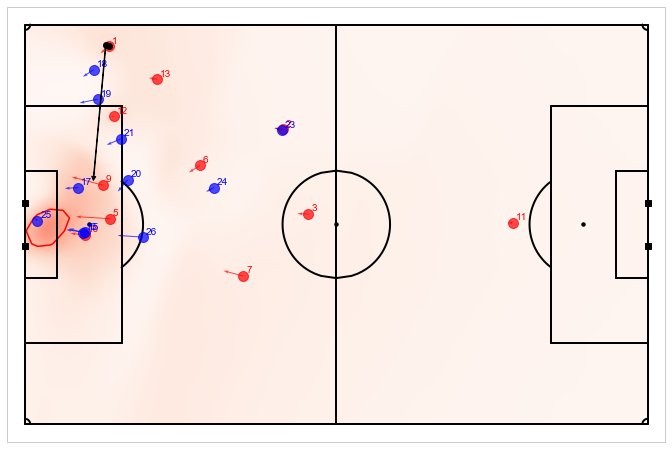

In [196]:
# assist example
event_number = 1_680
PPCF, xgrid, ygrid = mpc.generate_pitch_control_for_event(event_number, df_events, df_tracking_home, df_tracking_away, params, GK_numbers, field_dimen = (106.,68.,), n_grid_cells_x = 50, offsides=True)
fig, ax = mviz.plot_EPV_for_event(event_number, df_events, df_tracking_home, df_tracking_away, PPCF, EPV, annotate=True, autoscale=True, contours=True)

##### Visualise Pitch Control and EEPV for Events 403, 68, and 829

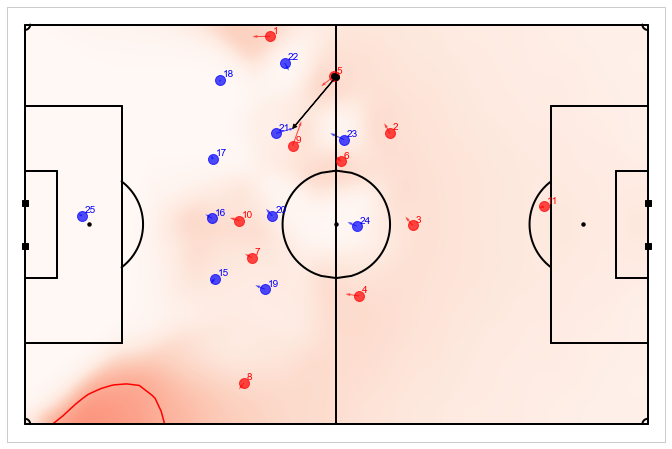

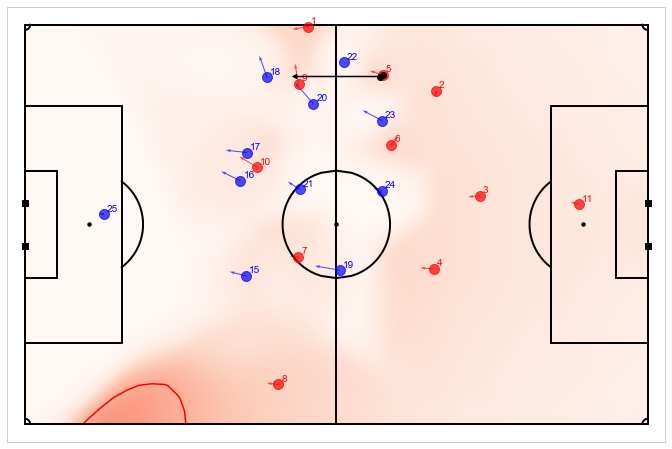

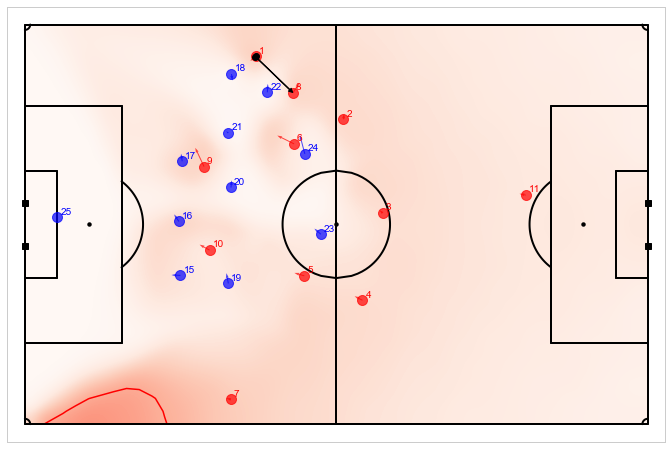

In [197]:
# cross-field passes
examples = [403, 68, 829]
for event_number in examples:
    PPCF, xgrid, ygrid = mpc.generate_pitch_control_for_event(event_number, df_events, df_tracking_home, df_tracking_away, params, GK_numbers, field_dimen = (106.,68.,), n_grid_cells_x = 50, offsides=True)
    fig, ax = mviz.plot_EPV_for_event(event_number, df_events, df_tracking_home, df_tracking_away, PPCF, EPV, annotate=True, autoscale=True, contours=True )

See the following video and skip to 9m58s where Trent Alexander-Arnold discusses about how effective he believes the switch of play is.

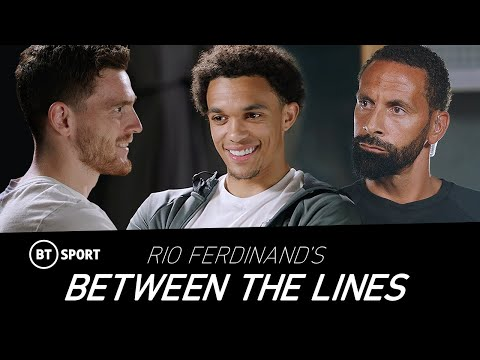

In [201]:
# See Rio Ferdinand's Between The Lines | Ep 1: The modern full-back role ft. Alexander-Arnold & Robertson @ 9m58s
YouTubeVideo('qx8YLMrJoW8', width=800, height=470)

### <a id='#section5.5'>5.5. Voranoi Tessellations

In [229]:
df_tracking_home_voranoi = mio.tracking_data(data_dir_metrica, game_id,'Home')
df_tracking_away_voranoi = mio.tracking_data(data_dir_metrica, game_id,'Away')

Reading team: home
Reading team: away


In [230]:
#scaling the data to Metric coordinates with the lower corner of the pitch at 0,0
def metric_scale(data):
    x_columns = [c for c in data.columns if c[-1].lower()=='x']
    y_columns = [c for c in data.columns if c[-1].lower()=='y']
    data[x_columns] = (data[x_columns]) * 104
    data[y_columns] = (1-data[y_columns]) * 68
    return data

In [231]:
df_tracking_home_voranoi = metric_scale(df_tracking_home_voranoi)
df_tracking_away_voranoi = metric_scale(df_tracking_away_voranoi)

Let's take a random frame

In [232]:
frame = 136

In [233]:
ball_x = df_tracking_home_voranoi.iloc[frame]['ball_x']
ball_y = df_tracking_away_voranoi.iloc[frame]['ball_y']

In [234]:
home_x = []
home_y = []
for i in df_tracking_home_voranoi.iloc[frame].keys():
    if "_x" in i and "ball" not in i:
        home_x.append(df_tracking_home_voranoi.iloc[frame][i])
    if "_y" in i and "ball" not in i:
        home_y.append(df_tracking_home_voranoi.iloc[frame][i])

In [235]:
away_x = []
away_y = []
for i in df_tracking_away_voranoi.iloc[frame].keys():
    if "_x" in i and "ball" not in i:
        away_x.append(df_tracking_away_voranoi.iloc[frame][i])
    if "_y" in i and "ball" not in i:
        away_y.append(df_tracking_away_voranoi.iloc[frame][i])

Below is a function to plot a pitch via Matplotlib

In [236]:
def draw_pitch(pitch_color="#FFFFFF", line_color="#000000", area="full"):
    
    """Plots a Football Pitch with dimensions 104X68
    Parameters:
    
    pitch_color (str):The color of the pitch. Default value is white.
    line_color (str):The color of the lines on the pitch. Default value is black.
    area (str):A vairable to decide whether we want half a pitch or full. Default value is full.
    """
    
    if area=='full':
        
        fig = plt.figure(figsize=(10.4,6.8))
        ax = fig.add_subplot(1,1,1)
        ax.patch.set_facecolor(pitch_color)
        ax.axis('off')
        
        #Outer Pitchlines
        outer_x = [0,104,104,0,0]
        outer_y = [0,0,68,68,0]
        plt.plot(outer_x,outer_y,color=line_color,zorder=5)
        
        #Centre line
        plt.plot([52,52],[0,68],color=line_color,zorder=5)
        
        #Outer Boxes
        left_outer_x = [104,87.5,87.5,104]
        left_outer_y = [13.84,13.84,54.16,54.16] 
        plt.plot(left_outer_x,left_outer_y,color=line_color,zorder=5)
        
        right_outer_x = [0,16.5,16.5,0]
        right_outer_y = [13.84,13.84,54.16,54.16] 
        plt.plot(right_outer_x,right_outer_y,color=line_color,zorder=5)
        
        #Goals
        left_goal_y = [30.34,30.34,37.66,37.66]
        left_goal_x = [0,-0.2,-0.2,0]
        plt.plot(left_goal_x,left_goal_y,color=line_color,zorder=5)
        
        right_goal_x = [104,104.2,104.2,104]
        right_goal_y = [30.34,30.34,37.66,37.66]
        plt.plot(right_goal_x,right_goal_y,color=line_color,zorder=5)
        
        #6 Yard Boxes
        left_six_x = [0,4.5,4.5,0]
        left_six_y = [24.84,24.84,43.16,43.16]
        plt.plot(left_six_x,left_six_y,color=line_color,zorder=5)
        
        right_six_x = [104,99.5,99.5,104]
        right_six_y = [24.84,24.84,43.16,43.16]
        plt.plot(right_six_x,right_six_y,color=line_color,zorder=5)
        
        #Penalty and centre spot
        plt.scatter(93,34,color=line_color,zorder=5)
        plt.scatter(11,34,color=line_color,zorder=5)
        plt.scatter(52,34,color=line_color,zorder=5)
        
        centre_circle = plt.Circle((52, 34), 9.15,ls='solid',lw=1.5,color=line_color, fill=False, zorder=2,alpha=1)
        left_circle = plt.Circle((10.5,34), 9.15,ls='solid',lw=1.5,color=line_color, fill=False, zorder=1,alpha=1)
        right_circle = plt.Circle((93.5,34), 9.15,ls='solid',lw=1.5,color=line_color, fill=False, zorder=1,alpha=1)

        #To hide the circle's extra part to only leave the D.
        rec1 = plt.Rectangle((87.5,20), 16,30,ls='-',color=pitch_color, zorder=1,alpha=1)
        rec2 = plt.Rectangle((0, 20), 16.5,30,ls='-',color=pitch_color, zorder=1,alpha=1)
        
        ax.add_patch(centre_circle)
        ax.add_patch(left_circle)
        ax.add_patch(right_circle)
        
        ax.add_patch(rec1)
        ax.add_patch(rec2)
        return ax
        
    if area=="half":
        
        fig = plt.figure(figsize=(6.8,5.2))
        ax = fig.add_subplot(1,1,1)
        ax.patch.set_facecolor(pitch_color)
        ax.axis('off')
        
        #Outer Pitchlines
        outer_x = [0,0,68,68,0]
        outer_y = [0,52,52,0,0]
        plt.plot(outer_x,outer_y,color=line_color,zorder=5)
        
        #OuterBox
        box_x = [13.84,13.84,54.16,54.16]
        box_y = [52,35.5,35.5,52]
        plt.plot(box_x,box_y,color=line_color,zorder=5)
        
        #Goal
        goal_x = [30.34,30.34,37.66,37.66]
        goal_y = [52,52.2,52.2,52]
        plt.plot(goal_x,goal_y,color=line_color,zorder=5)
        
        #6 Yard Box
        six_x = [24.84,24.84,43.16,43.16]
        six_y = [52,47.5,47.5,52]
        plt.plot(six_x,six_y,color=line_color,zorder=5)
        
        #Centre Sport and Penalty Spot 
        plt.scatter(34,0,color=line_color,zorder=5)
        plt.scatter(34,41,color=line_color,zorder=5)
        
        #Centre circle and D
        centre_circle = plt.Circle((34, 0), 9.15,ls='solid',lw=1.5,color=line_color, fill=False, zorder=2,alpha=1)
        upper_circle = plt.Circle((34,41.5), 9.15,ls='solid',lw=1.5,color=line_color, fill=False, zorder=1,alpha=1)
        
        #Rectangle to hide the extra part of the D
        rec1 = plt.Rectangle((23, 35.5), 30,16.5,ls='-',color=_color, zorder=1,alpha=1)
        
        
        ax.add_patch(centre_circle)
        ax.add_patch(upper_circle)
        ax.add_patch(rec1)
        return ax

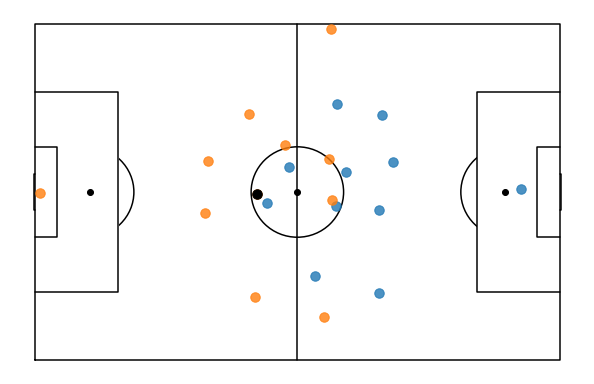

In [237]:
ax = draw_pitch()
ax.scatter(home_x, home_y, s=90.,zorder=12, alpha=0.8)
ax.scatter(away_x, away_y, s=90.,zorder=12, alpha=0.8)
ax.scatter(ball_x, ball_y, s=90.,zorder=12, color='black')

Turns out scipy library already has a Voronoi function.

In [238]:
x = home_x + away_x
y = home_y + away_y

In [239]:
x = [c for c in x if str(c)!='nan']
y = [c for c in y if str(c)!='nan']

In [240]:
from scipy.spatial import Voronoi, voronoi_plot_2d
vor = Voronoi(tuple(zip(x,y)))

(-10, 100)

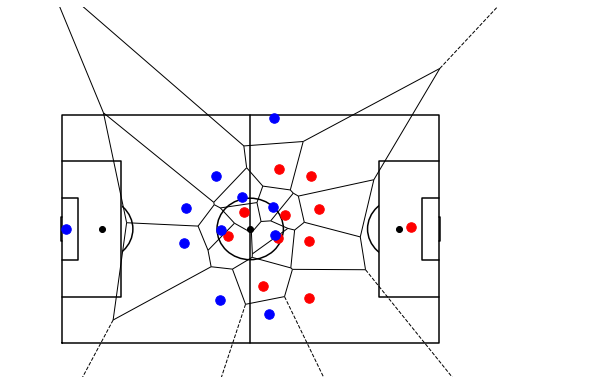

In [241]:
ax = draw_pitch()
voronoi_plot_2d(vor, ax, show_vertices=False, show_points=False)
ax.scatter(home_x, home_y, color='red', s=90,zorder=12)
ax.scatter(away_x,away_y, c='blue', s=90,zorder=12)
plt.xlim(-15,145)
plt.ylim(-10,100)

The problem with the above function is that it does not know about the boundaries of our pitch and so the polygons extend outside of our pitch.

To counter this, I came up with a rather neat hack.

Reflecting the points on all touchlines and generating a voronoi diagram with all these would ensure that all the vertices for the Voronoi diagram are inside the field.

Let's generate these reflected points

In [242]:
points = list(tuple(zip(x,y)))
points = points+[(i[0],-1*i[1]) for i in tuple(zip(x,y))]+[(-1*i[0],i[1]) for i in tuple(zip(x,y))]+[(104-i[0]+104,1*i[1]) for i in tuple(zip(x,y))]+[(i[0],68-i[1]+68) for i in tuple(zip(x,y))]

(-68, 141)

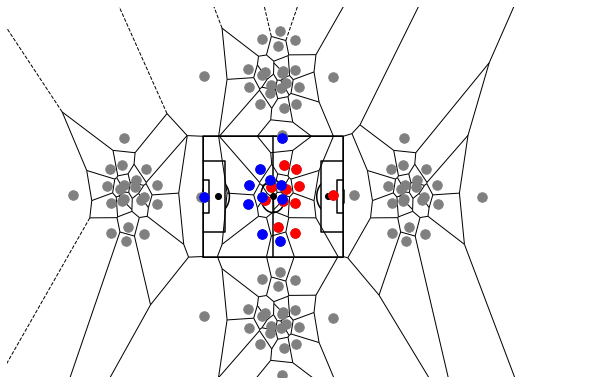

In [243]:
ax = draw_pitch()
vor = Voronoi(points)
voronoi_plot_2d(vor, ax, show_vertices=False, show_points=False)
ex_x,ex_y = zip(*points)
ax.scatter(ex_x,ex_y,c='grey',s=90,zorder=12)
ax.scatter(home_x, home_y, c='red', s=90,zorder=12)
ax.scatter(away_x,away_y, c='blue', s=90,zorder=12)
plt.xlim(-145,285)
plt.ylim(-68,141)

Granted the above looks quite ugly but out purpose is solved. The pitch contains closed polygons.

(0, 68)

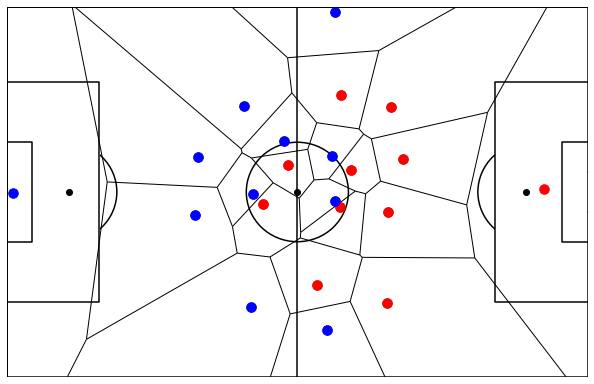

In [244]:
ax = draw_pitch()
vor = Voronoi(points)
voronoi_plot_2d(vor, ax, show_vertices=False, show_points=False)
ex_x,ex_y = zip(*points)
ax.scatter(ex_x,ex_y,c='grey',s=90)
ax.scatter(home_x, home_y, c='red', s=90,zorder=12)
ax.scatter(away_x,away_y, c='blue', s=90,zorder=12)
plt.xlim(0,104)
plt.ylim(0,68)

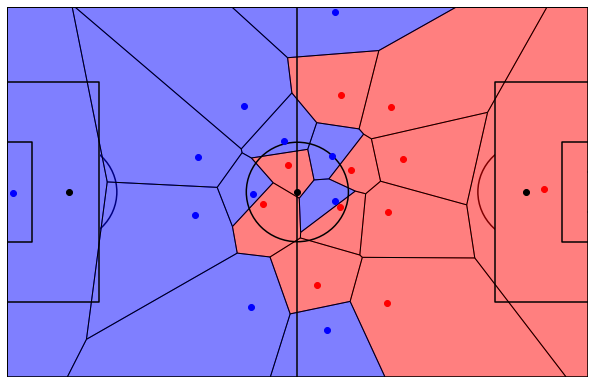

In [245]:
ax = draw_pitch()
x,y = zip(*vor.points)
voronoi_plot_2d(vor, ax, show_points=False, show_vertices=False, s=1)
for r in range(len(vor.point_region)):
    region = vor.regions[vor.point_region[r]]
    if not -1 in region:
        polygon = [vor.vertices[i] for i in region]
        if x[r] in home_x and y[r] in home_y:
            plt.scatter(x[r],y[r],color='red',zorder=12)
            plt.fill(*zip(*polygon),color='red',alpha=0.5)
        if x[r] in away_x and y[r] in away_y:
            plt.scatter(x[r],y[r],color='blue',zorder=12)
            plt.fill(*zip(*polygon),color='blue',alpha=0.5)
            
plt.xlim(0,104)
plt.ylim(0,68)
plt.show()


And there we have it. We can generate Voronoi diagram for any given frame just by changing the frame number above and re-running all the cells.

---

## <a id='#section6'>6. Summary</a>
This notebook is a short Exploratory Data Analysis (EDA) of [Metrica Sports](https://metrica-sports.com/) Tracking football data with [Python](https://www.python.org/) using [pandas](http://pandas.pydata.org/) DataFrames and [matplotlib](https://matplotlib.org/contents.html?v=20200411155018) visualisations.

---

## <a id='#section6'>7. Next Steps</a>
The step is to ...

---

## <a id='#section6'>8. References</a>

---

***Visit my website [EddWebster.com](https://www.eddwebster.com) or my [GitHub Repository](https://github.com/eddwebster) for more projects. If you'd like to get in contact, my Twitter handle is [@eddwebster](http://www.twitter.com/eddwebster) and my email is: edd.j.webster@gmail.com.***

[Back to the top](#top)